##  Health Care Analytics Project 
 
#### - Hima Pragnya Jonnalagadda
##### MS in MIS (Business Intelligence and Analytics Concentration )
##### Stevens Institute of Technology 




### Analyzing Market Dynamics and Revitalizing Brand Strategy for Market Cannibalization of an Injectable Anesthesia Drug

#### Problem Statement:


The anesthesia drug market is a segment of the pharmaceutical industry that focuses on the development, production, and distribution of medications used to induce and maintain anesthesia during medical procedures and surgeries. The market for anesthesia drugs encompasses a wide range of pharmaceutical products, including general anesthetics, local anesthetics, and adjunctive drugs that support the anesthesia process. The demand for these drugs is closely tied to the healthcare industry, as the number of surgical procedures, including both routine and complex surgeries, continues to grow worldwide. Factors such as an aging population, increased healthcare access, and advancements in medical technology contribute to the expansion of the anesthesia drug market. 

You are a Healthcare Commercial Analytics leader working for anesthesia drugs portfolio at a big pharma company. As an analytics leader, understanding market dynamics and making evidence-based decisions are crucial for the success of the business. Your company has a market leading brand (Product 1) in the anesthesia portfolio. Your company also has recently launched a variant of the same brand (Product 2) in the market which is supposed to cannibalize your leading brand. (Market cannibalization is a loss in sales caused by a company's introduction of a new product that displaces one of its own older products in the market. The cannibalization of existing products need not necessarily lead to an increase in the company's overall market share, but at least the sales growth for the new product should be at the expense of the drop in sales of the old product.)

However, the expected cannibalization is not happening in the market. It appears that instead of your new product capturing the dropping sales of your old product, one of your competitors (Product 3) is rapidly gaining market share, leaving your new product (Product 2) to lose its expected market share.

##### Your tasks are:
1.Perform data preparations using the datasets provided to have one analysis-ready dataset.

2.Analyze the provided Medicare CCLF claims data using the Key Business Questions provided below, and come up with strong data-driven, actionable business recommendations to gain market share for Product 2

3.Compile the above analysis and recommendations into a PowerPoint presentation.

4.Present your findings to a panel of judges using the presentation.


#### Datasets:
•	Medicare Claims Data (compressed csv files in 5 parts)

•	HCP Demographics Data - HCP_demographics_data.csv

•	Patient Demographics Data - Patient_demographics_data.csv

•	Zip to Territory Mapping Data - Zip_to_Territory_Mapping.csv

•	Diagnosis Code Mapping Data - Diagnosis_Code_Mapping.csv


In [78]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

##### Load and merge all the 5 datasets of medicare claims into one dataset

In [79]:
medicare_claims_part1_df = pd.read_csv('final_datasets/Medicare_Claims_data_part_1.csv')
medicare_claims_part2_df = pd.read_csv('final_datasets/Medicare_Claims_data_part_2.csv')
medicare_claims_part3_df = pd.read_csv('final_datasets/Medicare_Claims_data_part_3.csv')
medicare_claims_part4_df = pd.read_csv('final_datasets/Medicare_Claims_data_part_4.csv')
medicare_claims_part5_df = pd.read_csv('final_datasets/Medicare_Claims_data_part_5.csv')


In [80]:

# List of file names
file_names = ['final_datasets/Medicare_Claims_data_part_1.csv',
              'final_datasets/Medicare_Claims_data_part_2.csv', 
              'final_datasets/Medicare_Claims_data_part_3.csv', 
              'final_datasets/Medicare_Claims_data_part_4.csv', 
              'final_datasets/Medicare_Claims_data_part_5.csv']

medicare_claims_merged_df = pd.DataFrame()

# Looping through each file and append the data to the merged_data DataFrame
for file in file_names:
    #data = pd.DataFrame()
    data = pd.read_csv(file)
    # Append the data to the medicare_claims_merged_df DataFrame
    medicare_claims_merged_df = medicare_claims_merged_df.append(data, ignore_index=True)

# Save the merged data to a new CSV file
medicare_claims_merged_df.to_csv('final_datasets/medicare_claims_merged.csv', index=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_16896\4074529351.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medicare_claims_merged_df = medicare_claims_merged_df.append(data, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16896\4074529351.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medicare_claims_merged_df = medicare_claims_merged_df.append(data, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16896\4074529351.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medicare_claims_merged_df = medicare_claims_merged_df.append(data, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16896\4074529351.py:15: FutureWarning: The frame.append method is deprecated and will be removed from

In [81]:
medicare_claims_merged_df.sort_values(by=['cur_clm_uniq_id'])

,cur_clm_uniq_id,bene_mbi_id,fac_prvdr_npi_num,clm_from_dt,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,clm_dgns_cd,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd
988927,100020,10449,7.829223e+09,9/26/2016,12/5/2016,Z0289,NaN,NaN,4.0,88307,1.86,NaN,I10,NaN,NaN,10.31,69
973906,100020,10977,7.360579e+09,12/13/2017,6/12/2017,R262,NaN,NaN,1.0,Q0092,7.17,NaN,I10,NaN,NaN,8.86,6
990220,100020,1109,1.587946e+09,5/19/2017,7/27/2017,F209,1580.53,18398.95983,23.0,86141,-1.84,7.0,I4891,NaN,NaN,NaN,NaN
986891,100020,10882,1.414857e+09,4/3/2017,6/29/2017,K5000,NaN,NaN,1.0,93296,9.31,NaN,I10,NaN,NaN,13.45,41
983709,100020,963,1.414857e+09,11/3/2018,10/22/2018,E785,NaN,NaN,1.0,99152,2.81,NaN,I10,NaN,NaN,5.79,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979786,1699222,11825,1.907625e+09,7/11/2018,8/26/2018,K811,NaN,NaN,2.0,G0300,45.28,NaN,I10,NaN,NaN,67.93,7
988356,1699222,12706,9.487650e+09,4/8/2016,3/17/2016,Z79811,5860.30,43290.25564,NaN,36415,NaN,4.0,Z87891,2.0,0RT30ZZ,NaN,NaN
995528,1699222,1162,2.540069e+09,6/30/2018,4/23/2018,M5442,NaN,NaN,1.0,84439,65.70,NaN,I10,NaN,NaN,107.05,46
988385,1699222,10053,6.514841e+09,10/30/2018,10/23/2018,R001,NaN,NaN,1.0,85027,6.94,NaN,I10,NaN,NaN,83.45,69


In [82]:
# renaming the required columns of the medicare_claims_merged_df

medicare_claims_merged_df = medicare_claims_merged_df.rename(
            columns = {
                'cur_clm_uniq_id': 'Claim_id',
                'bene_mbi_id': 'Patient_id',
                'fac_prvdr_npi_num': 'HCP_NPI_ID',
                'clm_from_dt': 'Claim_date',
                'clm_dgns_cd':'Diagnosis_code',
                'clm_line_hcpcs_cd':'Procedure_code'
            })
medicare_claims_merged_df

,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd
0,1272380,10791,1.316539e+09,11/8/2016,11/7/2016,S81811D,154.73,11182.215670,11.0,G8996,-0.04,12.0,Z951,NaN,NaN,NaN,NaN
1,631196,10107,1.033202e+09,7/21/2016,7/12/2016,S0083XA,NaN,NaN,1.0,76700,2.57,NaN,I10,NaN,NaN,8.86,69
2,1548564,10412,1.880497e+09,7/14/2018,5/20/2018,R918,NaN,NaN,1.0,C1751,53.81,NaN,I10,NaN,NaN,86.40,30
3,1427731,10934,1.655569e+09,6/19/2016,7/15/2016,I2119,705.89,20750.005170,17.0,85378,-5.91,7.0,M25552,NaN,NaN,NaN,NaN
4,428779,965,1.644309e+09,3/21/2017,8/10/2018,C4490,2884.15,18437.664320,5.0,80061,2.62,6.0,Z9049,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,842577,27,2.094819e+09,7/15/2016,4/22/2017,Z01812,49.65,783.657678,5.0,J1885,4.83,4.0,E785,NaN,NaN,NaN,NaN
999996,309023,11454,4.138986e+09,4/24/2018,3/2/2018,M40203,NaN,NaN,1.0,J3010,47.40,NaN,I10,NaN,NaN,76.03,1
999997,568041,10869,5.314549e+09,1/17/2018,12/13/2017,J432,NaN,NaN,2.0,17004,43.87,NaN,I10,NaN,NaN,55.35,7
999998,100020,10784,5.599719e+09,12/23/2016,1/20/2017,I639,NaN,NaN,1.0,J1030,3.92,NaN,I10,NaN,NaN,15.02,8


In [83]:
# Required procedure codes 

procedure_codes = ['J1885', 'J2250', 'J2704', 'J3010']

unique_claims = medicare_claims_merged_df[medicare_claims_merged_df['Procedure_code'].isin(procedure_codes)]['Claim_id'].drop_duplicates()
unique_claims

971632     300876
971633     657288
971635     277076
971637     925065
971639     758729
           ...   
999990    1329547
999991    1429418
999994    1386221
999995     842577
999996     309023
Name: Claim_id, Length: 15145, dtype: int64

In [84]:
# medicare_claims_unique gives the Unique medicare claims belonging 
#to the Market brands (Procedure Codes) - J1885, J2250, J2704, J3010 

medicare_claims_unique = medicare_claims_merged_df[medicare_claims_merged_df['Claim_id'].isin(unique_claims)]
medicare_claims_unique.sort_values(by = ['Claim_id'])

,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd
974559,100020,12445,8.048681e+09,12/2/2016,8/27/2016,A403,NaN,NaN,4.0,74020,4.63,NaN,I10,NaN,NaN,14.98,69
988291,100020,1103,6.631687e+09,5/7/2016,9/13/2016,C61,55.45,397.298148,4.0,J1885,42.95,1.0,I10,NaN,NaN,NaN,NaN
988282,100020,10448,7.608359e+09,12/6/2016,12/3/2016,R1013,1222.58,713.083496,4.0,77065,45.18,4.0,M48061,NaN,NaN,NaN,NaN
988230,100020,10178,1.993805e+09,8/9/2018,10/30/2016,I270,NaN,NaN,2.0,86900,-0.57,NaN,I10,NaN,NaN,12.50,69
988211,100020,13223,5.932375e+09,1/14/2017,8/22/2016,Z85118,6196.49,42880.556830,NaN,36415,NaN,4.0,D72829,2.0,5A02210,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980053,1699222,10046,1.668349e+09,5/26/2017,3/7/2017,M25571,NaN,NaN,2.0,J0692,2.97,NaN,I10,NaN,NaN,58.80,30
987289,1699222,11613,1.265604e+09,8/1/2018,5/19/2018,C7A8,NaN,NaN,5.0,47000,210.38,NaN,I10,NaN,NaN,201.31,18
996162,1699222,11673,9.389352e+09,12/29/2018,12/29/2018,D472,NaN,NaN,1.0,G8484,7.46,NaN,I10,NaN,NaN,10.26,30
974897,1699222,10776,3.803195e+09,8/17/2018,8/31/2018,I517,NaN,NaN,1.0,33225,7.93,NaN,I10,NaN,NaN,73.90,46


In [85]:
print(medicare_claims_unique.isnull().sum())
print(medicare_claims_unique.shape[0])

Claim_id                            0
Patient_id                          0
HCP_NPI_ID                          0
Claim_date                          0
clm_thru_dt                         0
prncpl_dgns_cd                      3
clm_pmt_amt                     14016
clm_mdcr_instnl_tot_chrg_amt    13729
clm_line_num                     1638
Procedure_code                     99
clm_line_cvrd_pd_amt             1773
clm_val_sqnc_num_dgns           14499
Diagnosis_code                      0
clm_val_sqnc_num_prcdr          27478
clm_prcdr_cd                    27452
clm_line_alowd_chrg_amt         14450
clm_prvdr_spclty_cd             15166
dtype: int64
28368


#### Load HCP Demographics data

In [86]:
# Load HCP Demographics data 
hcp_demographics_raw_df = pd.read_csv('final_datasets/HCP_demographics_data.csv')
hcp_demographics_raw_df.drop_duplicates()

,HCP NPI ID,Address,City,State,ZIP Code,Specialty
0,8386928704,322 Roberts Drive Suite 888,South Shannonton,AS,67431,Neurology
1,3688956922,11734 Deanna Groves Suite 031,Leviburgh,OK,12405,Anesthesiology
2,5134290518,18686 Schwartz Streets,Shepherdstad,RI,97054,Neurology
3,6740392080,410 Woodard Drive Suite 766,East Calvinmouth,MA,92138,Gastroenterology
4,1178012810,83203 Jimenez Village Apt. 548,Griffinchester,WY,48202,Anesthesiology
...,...,...,...,...,...,...
1995,7648402660,1207 Olivia Via,Phillipfort,UT,81154,Anesthesiology
1996,5530159315,86116 Mathews Track Suite 253,Port Scott,TN,7721,Gastroenterology
1997,2202122399,070 Monica Loop,Haydenmouth,MD,98386,Cardiology
1998,6175046381,5842 George Roads Suite 456,Changchester,GA,98013,Gastroenterology


In [87]:
# rename hcp npi id to merge with the  medicare_claims_unique
hcp_demographics_raw_df = hcp_demographics_raw_df.rename(columns = {'HCP NPI ID' : 'HCP_NPI_ID',
                                                                    'ZIP Code' : 'zip_code',
                                                                    'Specialty' : 'HCP_speciality'})
hcp_demographics_raw_df.sort_values(by = ['State'])

,HCP_NPI_ID,Address,City,State,zip_code,HCP_speciality
1016,4980865227,844 Amanda Road Suite 018,East Timothy,AK,17343,Neurology
1395,9353359960,7861 Pratt Keys,West Monicamouth,AK,36204,Anesthesiology
61,7257852334,98320 Miranda Valleys Apt. 182,South John,AK,30140,Anesthesiology
1693,6114247758,44162 Tina Neck,Chadview,AK,40266,Anesthesiology
1160,3193315748,9218 Anna Point,Marissamouth,AK,81323,Orthopedics
...,...,...,...,...,...,...
950,4309900352,8324 Wilson Crossroad Apt. 989,East Katrinatown,WY,3853,Cardiology
1891,4993136828,849 Jack Bridge Suite 630,Lloydstad,WY,31569,Anesthesiology
944,4667330511,212 Rebecca Dam,East Jenny,WY,92375,Cardiology
1175,1001742844,419 Howard Ports,East Crystal,WY,77346,Anesthesiology


In [88]:
print(hcp_demographics_raw_df.isnull().sum())
print(hcp_demographics_raw_df.shape[0])

HCP_NPI_ID        0
Address           0
City              0
State             0
zip_code          0
HCP_speciality    0
dtype: int64
2000


#### Merge Medicare Claims data and HCP Demographics data

In [89]:
joined_df = pd.merge(medicare_claims_unique, hcp_demographics_raw_df,
                     on = 'HCP_NPI_ID', how = 'outer' )
joined_df.sort_values(by = ['HCP_NPI_ID']).drop_duplicates()


,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality
13210,1171692.0,11544.0,1.001502e+09,7/2/2018,3/28/2018,S60222A,NaN,NaN,1.0,93017,2.46,NaN,I10,NaN,NaN,2.37,30,9807 Richard Fort,New Katherine,CT,87576,Cardiology
13227,1323875.0,10043.0,1.001502e+09,8/10/2018,11/30/2017,M4316,50.79,4679.936481,6.0,99283,6.61,4.0,D693,NaN,NaN,NaN,NaN,9807 Richard Fort,New Katherine,CT,87576,Cardiology
13211,339869.0,10559.0,1.001502e+09,6/14/2017,6/12/2017,C8350,NaN,NaN,1.0,J3010,51.99,NaN,I10,NaN,NaN,77.53,34,9807 Richard Fort,New Katherine,CT,87576,Cardiology
13212,1699222.0,10878.0,1.001502e+09,10/17/2018,12/29/2018,I208,3270.26,19229.885210,4.0,J1100,5.82,1.0,I10,NaN,NaN,NaN,NaN,9807 Richard Fort,New Katherine,CT,87576,Cardiology
13213,1189849.0,12422.0,1.001502e+09,1/30/2018,7/19/2017,R7989,NaN,NaN,2.0,93798,2.61,NaN,I10,NaN,NaN,12.59,69,9807 Richard Fort,New Katherine,CT,87576,Cardiology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355,1356077.0,1179.0,9.970224e+09,6/21/2018,8/12/2018,D538,NaN,NaN,2.0,J3010,0.80,NaN,I10,NaN,NaN,6.29,69,680 Holmes Isle Suite 863,New Gabriellestad,DE,25438,Anesthesiology
5354,1665305.0,11784.0,9.970224e+09,11/4/2017,3/13/2018,H26491,9098.27,18889.711750,1.0,74177,1.53,1.0,R899,NaN,NaN,NaN,NaN,680 Holmes Isle Suite 863,New Gabriellestad,DE,25438,Anesthesiology
5364,513350.0,12113.0,9.970224e+09,12/11/2016,7/13/2016,S335XXA,NaN,NaN,2.0,99386,258.76,NaN,I10,NaN,NaN,495.82,11,680 Holmes Isle Suite 863,New Gabriellestad,DE,25438,Anesthesiology
28460,NaN,NaN,9.987556e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50788 Eaton Ways Suite 143,North Zachary,NV,39209,Anesthesiology


In [90]:
joined_df.isnull().sum()

Claim_id                         1501
Patient_id                       1501
HCP_NPI_ID                          0
Claim_date                       1501
clm_thru_dt                      1501
prncpl_dgns_cd                   1504
clm_pmt_amt                     15517
clm_mdcr_instnl_tot_chrg_amt    15230
clm_line_num                     3139
Procedure_code                   1600
clm_line_cvrd_pd_amt             3274
clm_val_sqnc_num_dgns           16000
Diagnosis_code                   1501
clm_val_sqnc_num_prcdr          28979
clm_prcdr_cd                    28953
clm_line_alowd_chrg_amt         15951
clm_prvdr_spclty_cd             16667
Address                             0
City                                0
State                               0
zip_code                            0
HCP_speciality                      0
dtype: int64

In [91]:
#Remove rows where Claim_id is Null 
joined_df = joined_df[joined_df['Claim_id'].notna()]
joined_df

,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality
0,300876.0,12388.0,7.348084e+09,6/3/2018,9/11/2018,H16223,NaN,NaN,1.0,J3010,36.07,NaN,I10,NaN,NaN,51.01,11,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology
1,560732.0,11129.0,7.348084e+09,10/8/2017,11/30/2017,I509,1412.24,11068.816620,7.0,45380,67.35,1.0,R899,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology
2,811068.0,11440.0,7.348084e+09,3/18/2018,10/7/2016,M25551,58.39,745.314118,4.0,J1885,53.12,3.0,R252,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology
3,1464994.0,11042.0,7.348084e+09,10/16/2018,10/29/2018,K449,219.62,4169.359086,4.0,J1885,3.68,1.0,R29810,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology
4,1207942.0,11684.0,7.348084e+09,5/17/2018,1/6/2018,R010,NaN,NaN,1.0,74230,128.46,NaN,I10,NaN,NaN,237.49,6,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28363,366098.0,11780.0,1.073606e+09,7/17/2017,5/10/2017,I350,93.21,3188.780278,4.0,J1885,38.75,4.0,K921,NaN,NaN,NaN,NaN,29398 Shields Valley,Fernandochester,HI,26527,Anesthesiology
28364,795094.0,1122.0,1.073606e+09,12/8/2018,11/19/2018,R0600,NaN,NaN,2.0,80051,1.79,NaN,I10,NaN,NaN,8.85,8,29398 Shields Valley,Fernandochester,HI,26527,Anesthesiology
28365,765590.0,10360.0,1.073606e+09,1/2/2018,4/13/2018,I429,1319.34,4275.116559,9.0,J3010,2.78,1.0,R498,NaN,NaN,NaN,NaN,29398 Shields Valley,Fernandochester,HI,26527,Anesthesiology
28366,383965.0,12696.0,1.073606e+09,6/15/2017,4/17/2017,F0390,NaN,NaN,1.0,J1885,30.91,NaN,I10,NaN,NaN,96.23,11,29398 Shields Valley,Fernandochester,HI,26527,Anesthesiology


In [92]:
joined_df.isnull().sum()


Claim_id                            0
Patient_id                          0
HCP_NPI_ID                          0
Claim_date                          0
clm_thru_dt                         0
prncpl_dgns_cd                      3
clm_pmt_amt                     14016
clm_mdcr_instnl_tot_chrg_amt    13729
clm_line_num                     1638
Procedure_code                     99
clm_line_cvrd_pd_amt             1773
clm_val_sqnc_num_dgns           14499
Diagnosis_code                      0
clm_val_sqnc_num_prcdr          27478
clm_prcdr_cd                    27452
clm_line_alowd_chrg_amt         14450
clm_prvdr_spclty_cd             15166
Address                             0
City                                0
State                               0
zip_code                            0
HCP_speciality                      0
dtype: int64

#### Load Patient Demopgraphics data 


In [93]:
patient_demographics_raw_df = pd.read_csv('final_datasets/Patient_demographics_data.csv')
patient_demographics_raw_df.sort_values(by = ['Patient_id']).drop_duplicates()

,Patient_id,Age,Gender
0,10,71,Male
1,11,56,Male
2,12,65,Female
3,13,72,Female
4,14,77,Female
...,...,...,...
4503,13376,64,Female
4504,13377,60,Male
4505,13378,23,Female
4506,13379,90,Female


In [94]:
print(patient_demographics_raw_df.isnull().sum())

Patient_id    0
Age           0
Gender        0
dtype: int64


#### Join the patient demographics data

In [95]:
joined_df = pd.merge(joined_df, patient_demographics_raw_df,
                    on = ['Patient_id'], how = 'outer')
joined_df

,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality,Age,Gender
0,300876.0,12388.0,7.348084e+09,6/3/2018,9/11/2018,H16223,NaN,NaN,1.0,J3010,36.07,NaN,I10,NaN,NaN,51.01,11,01683 Garcia Terrace,West Ronaldmouth,MH,10164.0,Anesthesiology,18,Female
1,1613004.0,12388.0,2.041597e+09,7/24/2018,3/14/2018,J441,21.24,10526.19862,3.0,J1885,0.24,1.0,Z0000,NaN,NaN,NaN,NaN,566 Anita Creek,Lake Mandyside,NE,4942.0,Cardiology,18,Female
2,696533.0,12388.0,3.540379e+09,12/15/2016,1/28/2017,I509,1086.51,14852.44697,23.0,J1885,-5.85,7.0,M8589,NaN,NaN,NaN,NaN,45295 Jones Land Apt. 262,Matthewfort,NV,95534.0,Anesthesiology,18,Female
3,560732.0,11129.0,7.348084e+09,10/8/2017,11/30/2017,I509,1412.24,11068.81662,7.0,45380,67.35,1.0,R899,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164.0,Anesthesiology,53,Male
4,1129561.0,11129.0,5.851014e+09,9/8/2018,11/10/2018,R232,1182.80,10761.98806,2.0,J2704,5.72,2.0,M25562,NaN,NaN,NaN,NaN,8896 Andrew Cove Apt. 472,Port Ashleyborough,MN,9645.0,Anesthesiology,53,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,NaN,13375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,Male
28827,NaN,13376.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,Female
28828,NaN,13377.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,Male
28829,NaN,13378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Female


In [96]:
print(joined_df.isnull().sum())

Claim_id                          463
Patient_id                          0
HCP_NPI_ID                        463
Claim_date                        463
clm_thru_dt                       463
prncpl_dgns_cd                    466
clm_pmt_amt                     14479
clm_mdcr_instnl_tot_chrg_amt    14192
clm_line_num                     2101
Procedure_code                    562
clm_line_cvrd_pd_amt             2236
clm_val_sqnc_num_dgns           14962
Diagnosis_code                    463
clm_val_sqnc_num_prcdr          27941
clm_prcdr_cd                    27915
clm_line_alowd_chrg_amt         14913
clm_prvdr_spclty_cd             15629
Address                           463
City                              463
State                             463
zip_code                          463
HCP_speciality                    463
Age                                 0
Gender                              0
dtype: int64


In [97]:
#Remove the claims with no claim_id
joined_df = joined_df[joined_df['Claim_id'].notna()]
joined_df

,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality,Age,Gender
0,300876.0,12388.0,7.348084e+09,6/3/2018,9/11/2018,H16223,NaN,NaN,1.0,J3010,36.07,NaN,I10,NaN,NaN,51.01,11,01683 Garcia Terrace,West Ronaldmouth,MH,10164.0,Anesthesiology,18,Female
1,1613004.0,12388.0,2.041597e+09,7/24/2018,3/14/2018,J441,21.24,10526.198620,3.0,J1885,0.24,1.0,Z0000,NaN,NaN,NaN,NaN,566 Anita Creek,Lake Mandyside,NE,4942.0,Cardiology,18,Female
2,696533.0,12388.0,3.540379e+09,12/15/2016,1/28/2017,I509,1086.51,14852.446970,23.0,J1885,-5.85,7.0,M8589,NaN,NaN,NaN,NaN,45295 Jones Land Apt. 262,Matthewfort,NV,95534.0,Anesthesiology,18,Female
3,560732.0,11129.0,7.348084e+09,10/8/2017,11/30/2017,I509,1412.24,11068.816620,7.0,45380,67.35,1.0,R899,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164.0,Anesthesiology,53,Male
4,1129561.0,11129.0,5.851014e+09,9/8/2018,11/10/2018,R232,1182.80,10761.988060,2.0,J2704,5.72,2.0,M25562,NaN,NaN,NaN,NaN,8896 Andrew Cove Apt. 472,Port Ashleyborough,MN,9645.0,Anesthesiology,53,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28363,624555.0,175.0,8.550502e+09,3/16/2016,2/17/2016,E039,NaN,NaN,1.0,93970,51.02,NaN,I10,NaN,NaN,12.89,30,804 Sarah Points Apt. 481,Mathisborough,OR,82063.0,Gastroenterology,42,Female
28364,657692.0,1350.0,6.048672e+09,12/29/2017,4/5/2018,Z981,NaN,NaN,4.0,J2704,3.78,NaN,I10,NaN,NaN,14.40,69,560 Karen Drive,Lake Rebecca,WA,10080.0,Anesthesiology,44,Male
28365,1176720.0,117.0,6.549117e+09,5/13/2017,7/16/2017,L718,NaN,NaN,1.0,L5301,132.88,NaN,I10,NaN,NaN,85.97,25,0529 Aguilar Points Suite 209,East Samuel,OH,10804.0,Orthopedics,67,Female
28366,1148103.0,1363.0,6.549117e+09,9/15/2017,11/7/2017,S20229A,NaN,NaN,1.0,G9326,6.92,NaN,I10,NaN,NaN,179.29,6,0529 Aguilar Points Suite 209,East Samuel,OH,10804.0,Orthopedics,58,Male


In [98]:
print(joined_df.isnull().sum())

Claim_id                            0
Patient_id                          0
HCP_NPI_ID                          0
Claim_date                          0
clm_thru_dt                         0
prncpl_dgns_cd                      3
clm_pmt_amt                     14016
clm_mdcr_instnl_tot_chrg_amt    13729
clm_line_num                     1638
Procedure_code                     99
clm_line_cvrd_pd_amt             1773
clm_val_sqnc_num_dgns           14499
Diagnosis_code                      0
clm_val_sqnc_num_prcdr          27478
clm_prcdr_cd                    27452
clm_line_alowd_chrg_amt         14450
clm_prvdr_spclty_cd             15166
Address                             0
City                                0
State                               0
zip_code                            0
HCP_speciality                      0
Age                                 0
Gender                              0
dtype: int64


#### Load Zip to Territory Mapping data 

In [99]:
zip_territory_mapping_raw_df = pd.read_csv('final_datasets/Zip_to_Territory_Mapping.csv')
zip_territory_mapping_raw_df

,Zip Code,Territory Name,Region Name
0,501,"St Louis, MO",Midwest
1,544,"St Louis, MO",Midwest
2,601,"St Louis, MO",Midwest
3,602,"St Louis, MO",Midwest
4,603,"St Louis, MO",Midwest
...,...,...,...
41678,99926,"Seattle, WA",West
41679,99927,"Seattle, WA",West
41680,99928,"Seattle, WA",West
41681,99929,"Seattle, WA",West


In [100]:
zip_territory_mapping_raw_df.isnull().sum()

Zip Code          0
Territory Name    0
Region Name       0
dtype: int64

In [101]:
#making the zip code of the joined_df and the zip_territory_mapping_raw_df into the same standard format.
#Formatting the zip code column to contain length of 5 digits
zip_territory_mapping_raw_df = zip_territory_mapping_raw_df.rename(columns={'Zip Code' : 'zip_code'})
zip_territory_mapping_raw_df['zip_code'] = zip_territory_mapping_raw_df['zip_code'].apply(lambda x: f"{int(x):05d}" if pd.notnull(x) else x)
joined_df['zip_code'] = joined_df['zip_code'].apply(lambda x: f"{int(x):05d}" if pd.notnull(x) else x)
joined_df

C:\Users\HP\AppData\Local\Temp\ipykernel_16896\3741681616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df['zip_code'] = joined_df['zip_code'].apply(lambda x: f"{int(x):05d}" if pd.notnull(x) else x)


,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality,Age,Gender
0,300876.0,12388.0,7.348084e+09,6/3/2018,9/11/2018,H16223,NaN,NaN,1.0,J3010,36.07,NaN,I10,NaN,NaN,51.01,11,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,18,Female
1,1613004.0,12388.0,2.041597e+09,7/24/2018,3/14/2018,J441,21.24,10526.198620,3.0,J1885,0.24,1.0,Z0000,NaN,NaN,NaN,NaN,566 Anita Creek,Lake Mandyside,NE,04942,Cardiology,18,Female
2,696533.0,12388.0,3.540379e+09,12/15/2016,1/28/2017,I509,1086.51,14852.446970,23.0,J1885,-5.85,7.0,M8589,NaN,NaN,NaN,NaN,45295 Jones Land Apt. 262,Matthewfort,NV,95534,Anesthesiology,18,Female
3,560732.0,11129.0,7.348084e+09,10/8/2017,11/30/2017,I509,1412.24,11068.816620,7.0,45380,67.35,1.0,R899,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,53,Male
4,1129561.0,11129.0,5.851014e+09,9/8/2018,11/10/2018,R232,1182.80,10761.988060,2.0,J2704,5.72,2.0,M25562,NaN,NaN,NaN,NaN,8896 Andrew Cove Apt. 472,Port Ashleyborough,MN,09645,Anesthesiology,53,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28363,624555.0,175.0,8.550502e+09,3/16/2016,2/17/2016,E039,NaN,NaN,1.0,93970,51.02,NaN,I10,NaN,NaN,12.89,30,804 Sarah Points Apt. 481,Mathisborough,OR,82063,Gastroenterology,42,Female
28364,657692.0,1350.0,6.048672e+09,12/29/2017,4/5/2018,Z981,NaN,NaN,4.0,J2704,3.78,NaN,I10,NaN,NaN,14.40,69,560 Karen Drive,Lake Rebecca,WA,10080,Anesthesiology,44,Male
28365,1176720.0,117.0,6.549117e+09,5/13/2017,7/16/2017,L718,NaN,NaN,1.0,L5301,132.88,NaN,I10,NaN,NaN,85.97,25,0529 Aguilar Points Suite 209,East Samuel,OH,10804,Orthopedics,67,Female
28366,1148103.0,1363.0,6.549117e+09,9/15/2017,11/7/2017,S20229A,NaN,NaN,1.0,G9326,6.92,NaN,I10,NaN,NaN,179.29,6,0529 Aguilar Points Suite 209,East Samuel,OH,10804,Orthopedics,58,Male


#### Join the Zip Territory Mapping data 

In [102]:
joined_df = pd.merge(joined_df, zip_territory_mapping_raw_df, 
                    on = ['zip_code'], how = 'outer')
joined_df

,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality,Age,Gender,Territory Name,Region Name
0,300876.0,12388.0,7.348084e+09,6/3/2018,9/11/2018,H16223,NaN,NaN,1.0,J3010,36.07,NaN,I10,NaN,NaN,51.01,11,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,18.0,Female,"St Louis, MO",Midwest
1,560732.0,11129.0,7.348084e+09,10/8/2017,11/30/2017,I509,1412.24,11068.816620,7.0,45380,67.35,1.0,R899,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,53.0,Male,"St Louis, MO",Midwest
2,811068.0,11440.0,7.348084e+09,3/18/2018,10/7/2016,M25551,58.39,745.314118,4.0,J1885,53.12,3.0,R252,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,68.0,Male,"St Louis, MO",Midwest
3,1464994.0,11042.0,7.348084e+09,10/16/2018,10/29/2018,K449,219.62,4169.359086,4.0,J1885,3.68,1.0,R29810,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,20.0,Male,"St Louis, MO",Midwest
4,1207942.0,11684.0,7.348084e+09,5/17/2018,1/6/2018,R010,NaN,NaN,1.0,74230,128.46,NaN,I10,NaN,NaN,237.49,6,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,41.0,Male,"St Louis, MO",Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99926,NaN,NaN,NaN,"Seattle, WA",West
69551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99927,NaN,NaN,NaN,"Seattle, WA",West
69552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99928,NaN,NaN,NaN,"Seattle, WA",West
69553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99929,NaN,NaN,NaN,"Seattle, WA",West


In [103]:
#check for null claim_id in the joined_df 
joined_df.isnull().sum()


Claim_id                        41187
Patient_id                      41187
HCP_NPI_ID                      41187
Claim_date                      41187
clm_thru_dt                     41187
prncpl_dgns_cd                  41190
clm_pmt_amt                     55203
clm_mdcr_instnl_tot_chrg_amt    54916
clm_line_num                    42825
Procedure_code                  41286
clm_line_cvrd_pd_amt            42960
clm_val_sqnc_num_dgns           55686
Diagnosis_code                  41187
clm_val_sqnc_num_prcdr          68665
clm_prcdr_cd                    68639
clm_line_alowd_chrg_amt         55637
clm_prvdr_spclty_cd             56353
Address                         41187
City                            41187
State                           41187
zip_code                            0
HCP_speciality                  41187
Age                             41187
Gender                          41187
Territory Name                      0
Region Name                         0
dtype: int64

In [104]:
# Remove the null records in the joined_df
joined_df = joined_df[joined_df['Claim_id'].notna()]
joined_df

,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality,Age,Gender,Territory Name,Region Name
0,300876.0,12388.0,7.348084e+09,6/3/2018,9/11/2018,H16223,NaN,NaN,1.0,J3010,36.07,NaN,I10,NaN,NaN,51.01,11,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,18.0,Female,"St Louis, MO",Midwest
1,560732.0,11129.0,7.348084e+09,10/8/2017,11/30/2017,I509,1412.24,11068.816620,7.0,45380,67.35,1.0,R899,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,53.0,Male,"St Louis, MO",Midwest
2,811068.0,11440.0,7.348084e+09,3/18/2018,10/7/2016,M25551,58.39,745.314118,4.0,J1885,53.12,3.0,R252,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,68.0,Male,"St Louis, MO",Midwest
3,1464994.0,11042.0,7.348084e+09,10/16/2018,10/29/2018,K449,219.62,4169.359086,4.0,J1885,3.68,1.0,R29810,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,20.0,Male,"St Louis, MO",Midwest
4,1207942.0,11684.0,7.348084e+09,5/17/2018,1/6/2018,R010,NaN,NaN,1.0,74230,128.46,NaN,I10,NaN,NaN,237.49,6,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,41.0,Male,"St Louis, MO",Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28363,1116952.0,10646.0,1.895037e+09,7/4/2018,9/21/2018,R32,9216.71,16982.178390,23.0,J1885,3.27,10.0,J329,NaN,NaN,NaN,NaN,527 Robert Wells,West Kylefurt,PW,91395,Anesthesiology,64.0,Male,"Denver, CO",West
28364,632173.0,12387.0,1.895037e+09,4/27/2017,4/25/2017,R7301,NaN,NaN,4.0,J1885,1.79,NaN,I10,NaN,NaN,19.37,69,527 Robert Wells,West Kylefurt,PW,91395,Anesthesiology,21.0,Male,"Denver, CO",West
28365,233158.0,13052.0,1.895037e+09,5/14/2017,3/5/2017,A4181,1155.58,15824.205180,4.0,J1885,0.15,9.0,D6859,NaN,NaN,NaN,NaN,527 Robert Wells,West Kylefurt,PW,91395,Anesthesiology,33.0,Female,"Denver, CO",West
28366,572687.0,976.0,1.895037e+09,2/9/2017,3/24/2017,I519,6964.51,16716.412100,14.0,J3010,2.63,6.0,Z887,NaN,NaN,NaN,NaN,527 Robert Wells,West Kylefurt,PW,91395,Anesthesiology,42.0,Female,"Denver, CO",West


In [105]:
#Check for null values after cleaned 
joined_df.isnull().sum()


Claim_id                            0
Patient_id                          0
HCP_NPI_ID                          0
Claim_date                          0
clm_thru_dt                         0
prncpl_dgns_cd                      3
clm_pmt_amt                     14016
clm_mdcr_instnl_tot_chrg_amt    13729
clm_line_num                     1638
Procedure_code                     99
clm_line_cvrd_pd_amt             1773
clm_val_sqnc_num_dgns           14499
Diagnosis_code                      0
clm_val_sqnc_num_prcdr          27478
clm_prcdr_cd                    27452
clm_line_alowd_chrg_amt         14450
clm_prvdr_spclty_cd             15166
Address                             0
City                                0
State                               0
zip_code                            0
HCP_speciality                      0
Age                                 0
Gender                              0
Territory Name                      0
Region Name                         0
dtype: int64

#### Load Diagnosis code mapping data 

In [106]:
diagnosis_code_mapping_raw_df = pd.read_csv('final_datasets/Diagnosis_Code_Mapping.csv')
diagnosis_code_mapping_raw_df

,Diagnosis Code Market,Specialty
0,A,Infectious and Parasitic Diseases
1,B,Infectious and Parasitic Diseases
2,C,Neoplasms
3,D,"Neoplasms, Blood, Blood-forming Organs"
4,E,"Endocrine, Nutritional, Metabolic"
5,F,Mental and Behavioral Disorders
6,G,Nervous System
7,H,"Eye and Adnexa, Ear and Mastoid Process"
8,I,Circulatory System
9,J,Respiratory System


In [107]:
# diagnosis_code_mapping_raw_df shall be joined with the joined_df on the diagnosis code market column 

#create a new column diagnosis_code_market in joined_df to map it with diagnosis_code_mapping_raw_df

joined_df['diagnosis_code_market'] = joined_df['Diagnosis_code'].str[0]
joined_df

C:\Users\HP\AppData\Local\Temp\ipykernel_16896\3076601214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df['diagnosis_code_market'] = joined_df['Diagnosis_code'].str[0]


,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality,Age,Gender,Territory Name,Region Name,diagnosis_code_market
0,300876.0,12388.0,7.348084e+09,6/3/2018,9/11/2018,H16223,NaN,NaN,1.0,J3010,36.07,NaN,I10,NaN,NaN,51.01,11,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,18.0,Female,"St Louis, MO",Midwest,I
1,560732.0,11129.0,7.348084e+09,10/8/2017,11/30/2017,I509,1412.24,11068.816620,7.0,45380,67.35,1.0,R899,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,53.0,Male,"St Louis, MO",Midwest,R
2,811068.0,11440.0,7.348084e+09,3/18/2018,10/7/2016,M25551,58.39,745.314118,4.0,J1885,53.12,3.0,R252,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,68.0,Male,"St Louis, MO",Midwest,R
3,1464994.0,11042.0,7.348084e+09,10/16/2018,10/29/2018,K449,219.62,4169.359086,4.0,J1885,3.68,1.0,R29810,NaN,NaN,NaN,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,20.0,Male,"St Louis, MO",Midwest,R
4,1207942.0,11684.0,7.348084e+09,5/17/2018,1/6/2018,R010,NaN,NaN,1.0,74230,128.46,NaN,I10,NaN,NaN,237.49,6,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,41.0,Male,"St Louis, MO",Midwest,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28363,1116952.0,10646.0,1.895037e+09,7/4/2018,9/21/2018,R32,9216.71,16982.178390,23.0,J1885,3.27,10.0,J329,NaN,NaN,NaN,NaN,527 Robert Wells,West Kylefurt,PW,91395,Anesthesiology,64.0,Male,"Denver, CO",West,J
28364,632173.0,12387.0,1.895037e+09,4/27/2017,4/25/2017,R7301,NaN,NaN,4.0,J1885,1.79,NaN,I10,NaN,NaN,19.37,69,527 Robert Wells,West Kylefurt,PW,91395,Anesthesiology,21.0,Male,"Denver, CO",West,I
28365,233158.0,13052.0,1.895037e+09,5/14/2017,3/5/2017,A4181,1155.58,15824.205180,4.0,J1885,0.15,9.0,D6859,NaN,NaN,NaN,NaN,527 Robert Wells,West Kylefurt,PW,91395,Anesthesiology,33.0,Female,"Denver, CO",West,D
28366,572687.0,976.0,1.895037e+09,2/9/2017,3/24/2017,I519,6964.51,16716.412100,14.0,J3010,2.63,6.0,Z887,NaN,NaN,NaN,NaN,527 Robert Wells,West Kylefurt,PW,91395,Anesthesiology,42.0,Female,"Denver, CO",West,Z


In [108]:
#Renaming the diagnosis code market column in diagnosis_code_mapping_raw_df to map with the joined_df

diagnosis_code_mapping_raw_df = diagnosis_code_mapping_raw_df.rename(columns = {'Diagnosis Code Market' : 'diagnosis_code_market',
                                                                                'Specialty' : 'diagnosis_speciality'})
diagnosis_code_mapping_raw_df

,diagnosis_code_market,diagnosis_speciality
0,A,Infectious and Parasitic Diseases
1,B,Infectious and Parasitic Diseases
2,C,Neoplasms
3,D,"Neoplasms, Blood, Blood-forming Organs"
4,E,"Endocrine, Nutritional, Metabolic"
5,F,Mental and Behavioral Disorders
6,G,Nervous System
7,H,"Eye and Adnexa, Ear and Mastoid Process"
8,I,Circulatory System
9,J,Respiratory System


In [109]:
joined_df = pd.merge(joined_df, diagnosis_code_mapping_raw_df, 
                    on = ['diagnosis_code_market'], how = 'outer')
joined_df

,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality,Age,Gender,Territory Name,Region Name,diagnosis_code_market,diagnosis_speciality
0,300876.0,12388.0,7.348084e+09,6/3/2018,9/11/2018,H16223,NaN,NaN,1.0,J3010,36.07,NaN,I10,NaN,NaN,51.01,11,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,18.0,Female,"St Louis, MO",Midwest,I,Circulatory System
1,1207942.0,11684.0,7.348084e+09,5/17/2018,1/6/2018,R010,NaN,NaN,1.0,74230,128.46,NaN,I10,NaN,NaN,237.49,6,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,41.0,Male,"St Louis, MO",Midwest,I,Circulatory System
2,421467.0,13194.0,7.348084e+09,10/28/2016,12/25/2016,C61,NaN,NaN,1.0,97162,69.09,NaN,I10,NaN,NaN,96.46,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,41.0,Female,"St Louis, MO",Midwest,I,Circulatory System
3,319575.0,11191.0,7.348084e+09,2/1/2017,12/12/2016,L84,NaN,NaN,2.0,A9270,1.63,NaN,I10,NaN,NaN,9.81,29,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,39.0,Male,"St Louis, MO",Midwest,I,Circulatory System
4,1599622.0,11045.0,7.348084e+09,3/12/2016,5/10/2017,D010,NaN,NaN,4.0,J3010,36.79,NaN,I10,NaN,NaN,78.46,10,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,79.0,Male,"St Louis, MO",Midwest,I,Circulatory System
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O,"Pregnancy, Childbirth and the Puerperium"
28369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,Certain Conditions Originating in the Perinata...
28370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,Codes for special purposes
28371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,External Causes of Morbidity


In [110]:
# Checking for any null claims in joined_df

joined_df.isnull().sum()
joined_df = joined_df[joined_df['Claim_id'].notna()]
joined_df

,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality,Age,Gender,Territory Name,Region Name,diagnosis_code_market,diagnosis_speciality
0,300876.0,12388.0,7.348084e+09,6/3/2018,9/11/2018,H16223,NaN,NaN,1.0,J3010,36.07,NaN,I10,NaN,NaN,51.01,11,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,18.0,Female,"St Louis, MO",Midwest,I,Circulatory System
1,1207942.0,11684.0,7.348084e+09,5/17/2018,1/6/2018,R010,NaN,NaN,1.0,74230,128.46,NaN,I10,NaN,NaN,237.49,6,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,41.0,Male,"St Louis, MO",Midwest,I,Circulatory System
2,421467.0,13194.0,7.348084e+09,10/28/2016,12/25/2016,C61,NaN,NaN,1.0,97162,69.09,NaN,I10,NaN,NaN,96.46,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,41.0,Female,"St Louis, MO",Midwest,I,Circulatory System
3,319575.0,11191.0,7.348084e+09,2/1/2017,12/12/2016,L84,NaN,NaN,2.0,A9270,1.63,NaN,I10,NaN,NaN,9.81,29,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,39.0,Male,"St Louis, MO",Midwest,I,Circulatory System
4,1599622.0,11045.0,7.348084e+09,3/12/2016,5/10/2017,D010,NaN,NaN,4.0,J3010,36.79,NaN,I10,NaN,NaN,78.46,10,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,79.0,Male,"St Louis, MO",Midwest,I,Circulatory System
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28363,419427.0,10503.0,5.360318e+09,1/28/2017,1/5/2017,L03011,1624.30,15804.167890,9.0,J1885,0.64,3.0,Y998,NaN,NaN,NaN,NaN,9364 Goodwin Center Suite 820,New Erin,WA,25328,Anesthesiology,44.0,Female,"Boston, MA",Northeast,Y,External Causes of Morbidity
28364,780504.0,10776.0,8.146417e+09,4/21/2017,5/3/2017,H25813,4156.64,12073.690350,5.0,J2250,60.74,3.0,Y838,NaN,NaN,NaN,NaN,5758 Brown Highway,Port Craig,NY,12189,Anesthesiology,70.0,Male,"Atlanta, GA",Southeast,Y,External Causes of Morbidity
28365,585291.0,11631.0,8.584919e+09,9/25/2017,4/15/2017,F39,157.71,519.182827,10.0,J3010,10.09,2.0,Y998,NaN,NaN,NaN,NaN,2785 Lori Route,Rebeccaborough,SC,28163,Anesthesiology,65.0,Male,"Houston, TX",Southeast,Y,External Causes of Morbidity
28366,1205276.0,11669.0,6.849244e+09,3/14/2017,5/23/2017,I482,130.82,579.673456,1.0,J1885,58.98,1.0,Y998,NaN,NaN,NaN,NaN,4233 Jones Station,Curryburgh,NY,83805,Anesthesiology,30.0,Female,"Seattle, WA",West,Y,External Causes of Morbidity


In [111]:
joined_df.isnull().sum()

Claim_id                            0
Patient_id                          0
HCP_NPI_ID                          0
Claim_date                          0
clm_thru_dt                         0
prncpl_dgns_cd                      3
clm_pmt_amt                     14016
clm_mdcr_instnl_tot_chrg_amt    13729
clm_line_num                     1638
Procedure_code                     99
clm_line_cvrd_pd_amt             1773
clm_val_sqnc_num_dgns           14499
Diagnosis_code                      0
clm_val_sqnc_num_prcdr          27478
clm_prcdr_cd                    27452
clm_line_alowd_chrg_amt         14450
clm_prvdr_spclty_cd             15166
Address                             0
City                                0
State                               0
zip_code                            0
HCP_speciality                      0
Age                                 0
Gender                              0
Territory Name                      0
Region Name                         0
diagnosis_co

In [112]:
# Saving the analysis ready data into a csv file 
joined_df.to_csv('final_datasets/joined_df.csv', index=False)

# Key Business Questions:

## Market Dynamics and Competitive Landscape Assessment:


##### Perform a comprehensive analysis of the injectable anesthesia market for the years 2016 to 2018. 
Identify and explain the trends in market share, growth rates, and other key indicators for Products 1, 2, 3, and 4. 

How have these trends evolved over time, and what insights can be drawn from them? 

Compare and contrast the performance of Products 1, 2, 3, and 4 in the market. 

What sets Product 3 apart as a competitor that is rapidly gaining market share while Products 1 and 2 are struggling?

In [113]:
# Creating a new column to contain the year in which the claim was made 


# Get claim year
joined_df['Claim_year'] = pd.to_datetime(
    joined_df['Claim_date']
).dt.strftime('%Y')
joined_df['Claim_year'] = joined_df['Claim_year'].astype('int64')

C:\Users\HP\AppData\Local\Temp\ipykernel_16896\2751938855.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df['Claim_year'] = pd.to_datetime(
C:\Users\HP\AppData\Local\Temp\ipykernel_16896\2751938855.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df['Claim_year'] = joined_df['Claim_year'].astype('int64')


In [114]:
# claims for years 2016-2018

joined_df_2016_2018 = joined_df[(joined_df['Claim_year']>=2016) & (joined_df['Claim_year']<=2018)]
joined_df_2016_2018

,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality,Age,Gender,Territory Name,Region Name,diagnosis_code_market,diagnosis_speciality,Claim_year
0,300876.0,12388.0,7.348084e+09,6/3/2018,9/11/2018,H16223,NaN,NaN,1.0,J3010,36.07,NaN,I10,NaN,NaN,51.01,11,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,18.0,Female,"St Louis, MO",Midwest,I,Circulatory System,2018
1,1207942.0,11684.0,7.348084e+09,5/17/2018,1/6/2018,R010,NaN,NaN,1.0,74230,128.46,NaN,I10,NaN,NaN,237.49,6,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,41.0,Male,"St Louis, MO",Midwest,I,Circulatory System,2018
2,421467.0,13194.0,7.348084e+09,10/28/2016,12/25/2016,C61,NaN,NaN,1.0,97162,69.09,NaN,I10,NaN,NaN,96.46,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,41.0,Female,"St Louis, MO",Midwest,I,Circulatory System,2016
3,319575.0,11191.0,7.348084e+09,2/1/2017,12/12/2016,L84,NaN,NaN,2.0,A9270,1.63,NaN,I10,NaN,NaN,9.81,29,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,39.0,Male,"St Louis, MO",Midwest,I,Circulatory System,2017
4,1599622.0,11045.0,7.348084e+09,3/12/2016,5/10/2017,D010,NaN,NaN,4.0,J3010,36.79,NaN,I10,NaN,NaN,78.46,10,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,79.0,Male,"St Louis, MO",Midwest,I,Circulatory System,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28363,419427.0,10503.0,5.360318e+09,1/28/2017,1/5/2017,L03011,1624.30,15804.167890,9.0,J1885,0.64,3.0,Y998,NaN,NaN,NaN,NaN,9364 Goodwin Center Suite 820,New Erin,WA,25328,Anesthesiology,44.0,Female,"Boston, MA",Northeast,Y,External Causes of Morbidity,2017
28364,780504.0,10776.0,8.146417e+09,4/21/2017,5/3/2017,H25813,4156.64,12073.690350,5.0,J2250,60.74,3.0,Y838,NaN,NaN,NaN,NaN,5758 Brown Highway,Port Craig,NY,12189,Anesthesiology,70.0,Male,"Atlanta, GA",Southeast,Y,External Causes of Morbidity,2017
28365,585291.0,11631.0,8.584919e+09,9/25/2017,4/15/2017,F39,157.71,519.182827,10.0,J3010,10.09,2.0,Y998,NaN,NaN,NaN,NaN,2785 Lori Route,Rebeccaborough,SC,28163,Anesthesiology,65.0,Male,"Houston, TX",Southeast,Y,External Causes of Morbidity,2017
28366,1205276.0,11669.0,6.849244e+09,3/14/2017,5/23/2017,I482,130.82,579.673456,1.0,J1885,58.98,1.0,Y998,NaN,NaN,NaN,NaN,4233 Jones Station,Curryburgh,NY,83805,Anesthesiology,30.0,Female,"Seattle, WA",West,Y,External Causes of Morbidity,2017


### a.	Calculate and analyze the share of claims, patients and the HCPs using the HCPCS/CPT codes of these 4 products.


#### 1.	A 100% stacked bar graph showing claims percentage of each product per year, where one bar represents one year.


In [115]:
# Get the total number of unique claims for the given Products in 2016 - 2018
procedure_groups = {
    'J1885': 'Ketotrom',
    'J2250': 'Midoride',
    'J3010': 'Fentirate',
    'J2704': 'Profativ'
}
#procedure_groups =  ['Ketotrom(J1885)','Midoride(J2250)','Fentirate(J3010)','Profativ(J2704)']
total_num_uniq_clm_by_year_df = joined_df_2016_2018.pivot_table(
    index='Claim_year',
    columns='Procedure_code',
    aggfunc='size',
    fill_value=0
)[procedure_groups.keys()]
total_num_uniq_clm_by_year_df 

Procedure_code,J1885,J2250,J3010,J2704
Claim_year,,,,
2016,3153,429,609,81
2017,3695,417,1041,237
2018,3299,302,1613,386


In [116]:
import matplotlib.pyplot as plt


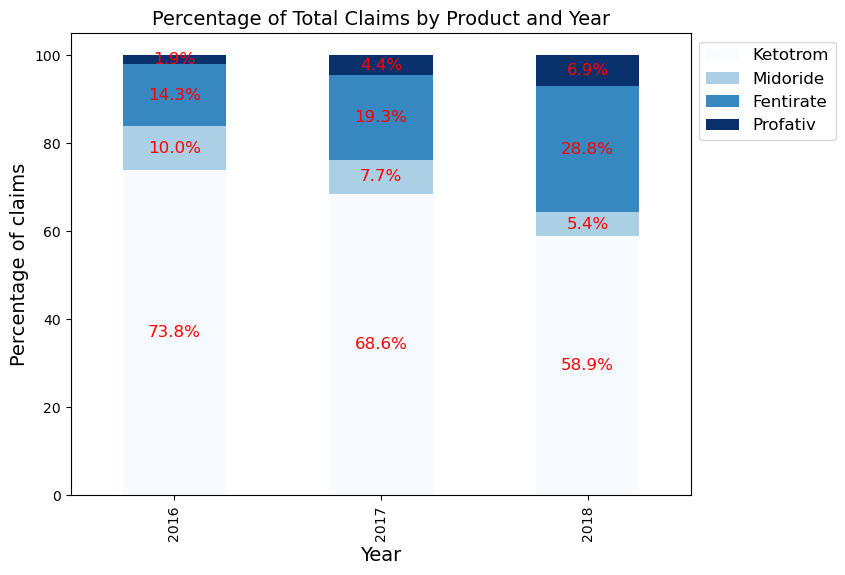

In [117]:
#cols_to_plot = [procedure_groups['J1885'],procedure_groups['J2250'],procedure_groups['J3010'],procedure_groups['J2704']]

# Plotting the stacked bar graph
# Calculate percentages
total_num_uniq_clm_by_year_df_percentage = total_num_uniq_clm_by_year_df.div(
    total_num_uniq_clm_by_year_df.sum(axis=1), axis=0
) * 100

# Plotting the stacked bar graph with percentages inside each segment
ax = total_num_uniq_clm_by_year_df_percentage.plot(kind='bar', stacked=True, colormap='Blues', figsize=(8, 6))

# Adding legend
legend_labels = [f"{name}" for code, name in procedure_groups.items()]
ax.legend(legend_labels, loc='upper left', fontsize=12,bbox_to_anchor=(1, 1))

# Setting labels and title
plt.xlabel('Year',fontsize=14)
plt.ylabel('Percentage of claims',fontsize=14)
plt.title('Percentage of Total Claims by Product and Year',fontsize=14)

# Display the percentages inside each segment
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%', fontsize=12, color='Red')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()




#### 2.	A 100% stacked bar graph showing the number of patients of each product per year, where one bar represents one year.

In [118]:
import matplotlib.pyplot as plt
procedure_groups = {
    'J1885': 'Ketotrom',
    'J2250': 'Midoride',
    'J3010': 'Fentirate',
    'J2704': 'Profativ'
}
#procedure_groups =  ['Ketotrom(J1885)','Midoride(J2250)','Fentirate(J3010)','Profativ(J2704)']
total_num_uniq_patients_by_year_df = joined_df_2016_2018.pivot_table(
    index='Claim_year',
    columns='Procedure_code',
    values='Patient_id',  # Using 'Patient_id' as values for aggregation
    aggfunc=pd.Series.nunique,  # Use nunique to count the number of unique patients
    fill_value=0
)[procedure_groups.keys()]
total_num_uniq_patients_by_year_df 

Procedure_code,J1885,J2250,J3010,J2704
Claim_year,,,,
2016,2017,395,544,81
2017,2155,398,862,229
2018,2021,283,1266,367


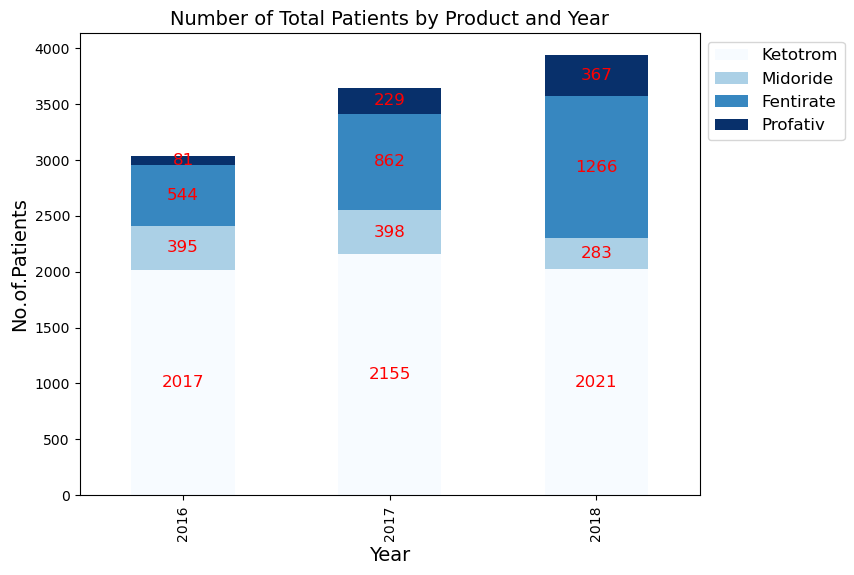

In [119]:
# Plotting the stacked bar graph for the unque patients for each product per year 

# Plotting the stacked bar graph

total_num_uniq_patient_by_year_df_percentage = total_num_uniq_patients_by_year_df.div(
    total_num_uniq_patients_by_year_df.sum(axis=1), axis=0) * 100

# Plotting the stacked bar graph with percentages inside each segment
ax = total_num_uniq_patients_by_year_df .plot(kind='bar', stacked=True, colormap='Blues', figsize=(8, 6))

# Adding legend
legend_labels = [f"{name}" for code, name in procedure_groups.items()]
ax.legend(legend_labels, loc='upper left',fontsize=12, bbox_to_anchor=(1, 1))

# Setting labels and title
plt.xlabel('Year',fontsize=14)
plt.ylabel('No.of.Patients',fontsize=14)
plt.title('Number of Total Patients by Product and Year',fontsize=14)

# Display the percentages inside each segment
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=12, color='red')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


##### 3.	A 100% stacked bar graph showing the number of HCPs (I.e., writers) writing claims for each product per year, where one bar represents one year.


In [120]:
# Creating a pivot table to understand the HCP behavior in writing claims 

procedure_groups = {
    'J1885': 'Ketotrom',
    'J2250': 'Midoride',
    'J3010': 'Fentirate',
    'J2704': 'Profativ'
}
#procedure_groups =  ['Ketotrom(J1885)','Midoride(J2250)','Fentirate(J3010)','Profativ(J2704)']
total_num_uniq_hcpcs_by_year_df = joined_df_2016_2018.pivot_table(
    index='Claim_year',
    columns='Procedure_code',
    values='HCP_NPI_ID',  # Using 'Patient_id' as values for aggregation
    aggfunc=pd.Series.nunique,  # Use nunique to count the number of unique patients
    fill_value=0
)[procedure_groups.keys()]
total_num_uniq_hcpcs_by_year_df


Procedure_code,J1885,J2250,J3010,J2704
Claim_year,,,,
2016,492,285,344,72
2017,495,276,416,187
2018,496,226,468,268


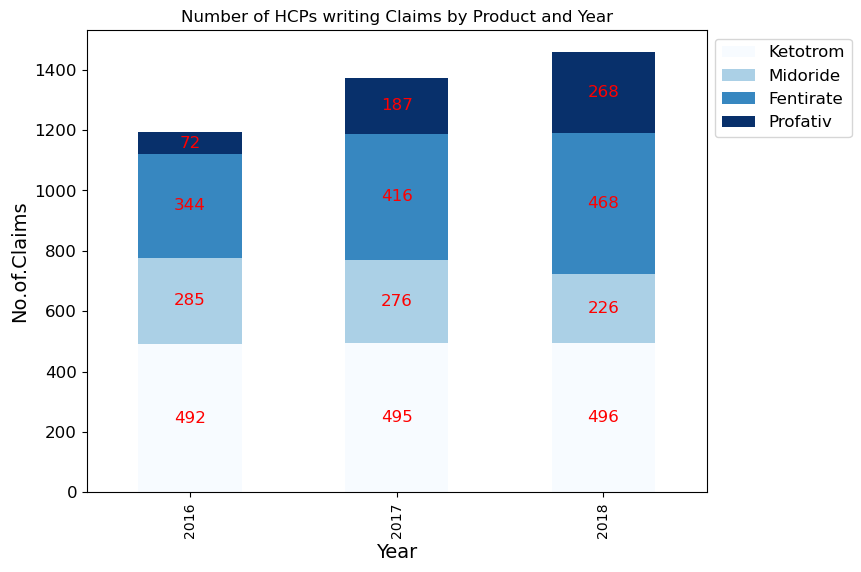

In [121]:

# Plotting the stacked bar graph for the claims written by HCPs for each product per year 

# Plotting the stacked bar graph

total_num_uniq_hcpcs_by_year_df_percentage = total_num_uniq_hcpcs_by_year_df.div(
    total_num_uniq_hcpcs_by_year_df.sum(axis=1), axis=0) * 100

# Plotting the stacked bar graph with percentages inside each segment
ax = total_num_uniq_hcpcs_by_year_df.plot(kind='bar', stacked=True, colormap='Blues', figsize=(8, 6))

# Adding legend
legend_labels = [f"{name}" for code, name in procedure_groups.items()]
ax.legend(legend_labels, loc='upper left',fontsize=12, bbox_to_anchor=(1, 1))

# Setting labels and title
plt.xlabel('Year',fontsize=14)
plt.ylabel('No.of.Claims',fontsize=14)
plt.title('Number of HCPs writing Claims by Product and Year')

# Display the percentages inside each segment
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=12, color='red')
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.show()

#### 4.What do you observe from the charts above? What would be your actionable recommendations based on your observations?

  
##### Dominant Product: 
Ketotrom - proportion decreases over time from 73.8% in 2016 to 58.9% in 2018.​
##### Declining Product: 
Midoride - shows a declining trend in their percentage of total claims. A sharp drop from 10% in 2016 to 5.% in 2018.​
##### Growing Product: 
Fentirate – Stable claim percentages with an increase of 50% from 2016 – 2018.​
##### Expanding Product: 
Profative – Consistent increase in usage of the product

##### Patients claiming Fentirate & Profative increased by 3.5x with a notable decrease in claims for Midoride by 2.5x
##### By 2018, the number of HCPs prescribing Midoride and Ketotram remained stable, whereas the number of HCPs prescribing Fentirate increased significantly.

##### Actionable recommendations :
Identify why HCPs prescribing the competitor brand accelerated?

Target the Prescribers of the competitor brand. 

To improve patient claims, evaluate the pricing strategy – Offer discounts, patients assistance programs. 

To make HCPs prescribe – Share the results of clinical trials and demonstrate the safety and efficacy of Midoride.

Increase promotional efforts – Medical conferences and publications.

### b.Calculate and analyze the number of claims per HCP (aka writer) and the number of patients per HCP for each product.

#### 1.	A line graph showing the number of claims per writer per year, where one line represents one product, and one set of vertical data points are for one year.


##### Determine the number of claims each HCP wrote and number for patients that visited the HCP for each product 

In [122]:
claims_per_hcp = joined_df_2016_2018.groupby(['Procedure_code', 'Claim_year'])['Claim_id'].count() / joined_df_2016_2018.groupby(['Procedure_code', 'Claim_year'])['HCP_NPI_ID'].nunique()

# Unstacking the data for line plot
claims_per_hcp_unstacked = claims_per_hcp.unstack(level=0)[list(procedure_groups.keys())]

claims_per_hcp_unstacked

Procedure_code,J1885,J2250,J3010,J2704
Claim_year,,,,
2016,6.408537,1.505263,1.770349,1.125000
2017,7.464646,1.510870,2.502404,1.267380
2018,6.651210,1.336283,3.446581,1.440299


In [123]:
patients_per_hcp = joined_df_2016_2018.groupby(['Procedure_code', 'Claim_year'])['Patient_id'].nunique() / joined_df_2016_2018.groupby(['Procedure_code', 'Claim_year'])['HCP_NPI_ID'].nunique()

# Unstacking the data for line plot
patients_per_hcp_unstacked = patients_per_hcp.unstack(level=0)[list(procedure_groups.keys())]
patients_per_hcp_unstacked

Procedure_code,J1885,J2250,J3010,J2704
Claim_year,,,,
2016,4.099593,1.385965,1.581395,1.125000
2017,4.353535,1.442029,2.072115,1.224599
2018,4.074597,1.252212,2.705128,1.369403


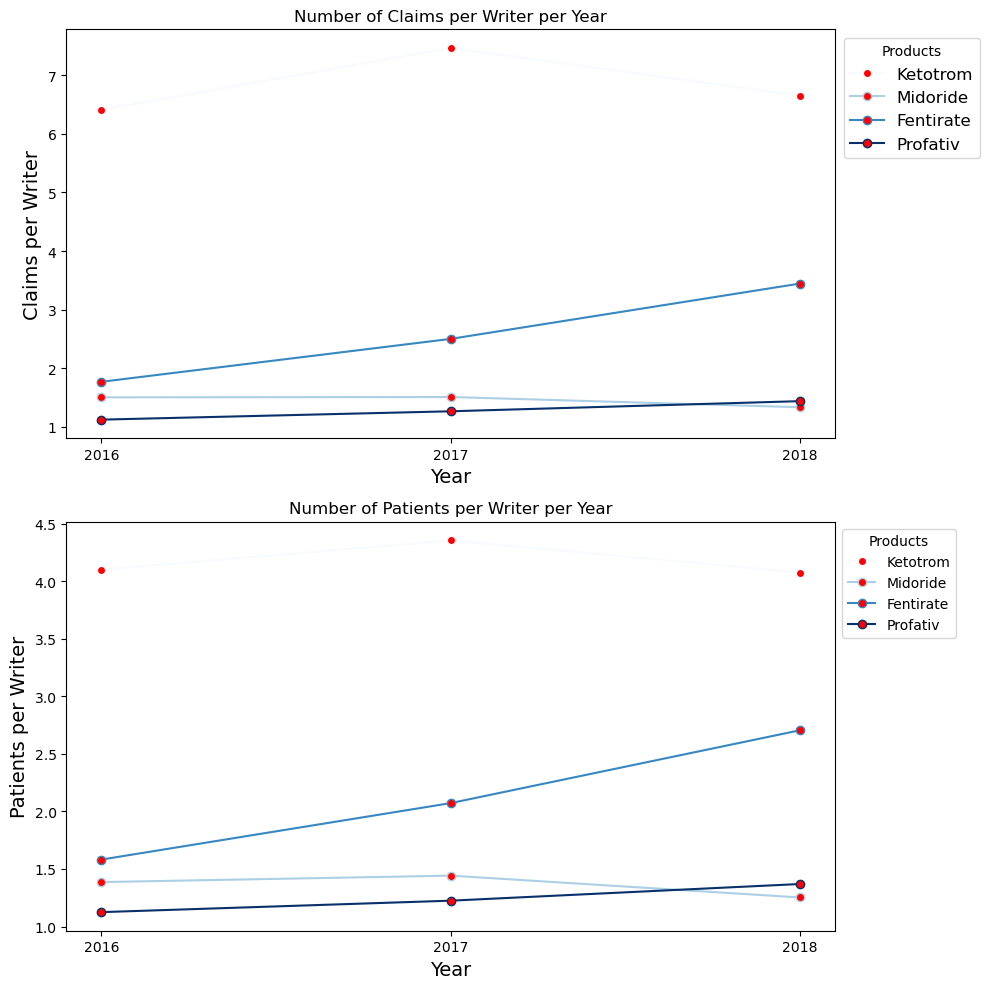

In [124]:




# Plotting the line graphs
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Number of claims per writer per year
claims_per_hcp_unstacked.plot(ax=axes[0], title='Number of Claims per Writer per Year',colormap = 'Blues',marker = 'o',markerfacecolor='red')
axes[0].legend(loc='upper left', title='Products',bbox_to_anchor=(1, 1),fontsize = 12, labels=procedure_groups.values())
axes[0].set_xlabel('Year',fontsize=14)
axes[0].set_ylabel('Claims per Writer',fontsize=14)

#axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))  
axes[0].set_xticks([2016, 2017, 2018]) 

# Number of patients

patients_per_hcp_unstacked.plot(ax=axes[1], title='Number of Patients per Writer per Year', colormap = 'Blues',marker = 'o',markerfacecolor='red')
axes[1].legend(loc='upper left',title='Products',bbox_to_anchor=(1, 1), labels=procedure_groups.values())
axes[1].set_xlabel('Year',fontsize=14)
axes[1].set_ylabel('Patients per Writer',fontsize=14)

#axes[1].xaxis.set_major_locator(MaxNLocator(integer=True))  
axes[1].set_xticks([2016, 2017, 2018]) 

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

#### 3.	What do you observe from the charts above? What would be your actionable recommendations based on your observations?

Midoride is a high considerable product for HCPs in 2018.

Slightly reduced prescriptions and patients per HCP for Midoride in 2018. 

Increased Prescription and patient rate per HCP for the competitor products from 2017- 2018

##### Recommendations: 

Segmentation of HCP by performance – 

     1. Worst performing HCP (writing less no. Of. prescriptions) and 

     2. Best Performing HCP (writing more no. Of. prescriptions) 

Target the Best performing HCP of the competitor brand, sales team to make personal appointments and explain – Provide samples. 

Map the sales rep to the respective speciality – Highlight the benefits of Medoride for that sepciality.

Focus on  HCPs who are high prescribers of Ketotrom to start prescribing Midoride for injectibe anesthesia.

### c.	Find the top 5 territories with the most drop in claims volume from year 2017 to 2018 for the variant brand and compare it with that of the competitor brand (Product 3 – J3010).

##### i. Find the territory-level claims volume per product per year.

In [125]:
# Get the total number of unique claims for the variant Product (J2250) per territory in 2016 - 2018
variant_brand_claims = joined_df_2016_2018[joined_df_2016_2018['Procedure_code'] == 'J2250']
variant_brand_claims


,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality,Age,Gender,Territory Name,Region Name,diagnosis_code_market,diagnosis_speciality,Claim_year
19,206791.0,11082.0,7.348084e+09,9/9/2016,9/25/2016,E079,NaN,NaN,4.0,J2250,4.68,NaN,I10,NaN,NaN,12.94,11,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,66.0,Male,"St Louis, MO",Midwest,I,Circulatory System,2016
38,606216.0,10021.0,2.041597e+09,7/18/2016,9/5/2016,M2550,NaN,NaN,1.0,J2250,4.11,NaN,I10,NaN,NaN,10.35,6,566 Anita Creek,Lake Mandyside,NE,04942,Cardiology,32.0,Female,"Pittsburg, PA",Northeast,I,Circulatory System,2016
50,1407166.0,10623.0,2.041597e+09,6/28/2018,2/25/2018,R569,2403.46,10332.576210,4.0,J2250,3.33,4.0,I10,NaN,NaN,60.29,NaN,566 Anita Creek,Lake Mandyside,NE,04942,Cardiology,26.0,Male,"Pittsburg, PA",Northeast,I,Circulatory System,2018
77,174766.0,10810.0,2.041597e+09,9/8/2016,5/22/2016,I110,NaN,NaN,1.0,J2250,2.22,NaN,I10,NaN,NaN,13.07,8,566 Anita Creek,Lake Mandyside,NE,04942,Cardiology,70.0,Male,"Pittsburg, PA",Northeast,I,Circulatory System,2016
203,1195493.0,11197.0,3.354939e+09,8/17/2017,7/2/2017,R079,NaN,NaN,1.0,J2250,6.51,NaN,I10,NaN,NaN,12.45,69,746 Garcia Locks Suite 901,Turnerhaven,ME,50065,Anesthesiology,51.0,Male,"New York, NY",Northeast,I,Circulatory System,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28319,1376592.0,11027.0,3.561919e+09,10/1/2016,4/30/2016,K859,804.59,24532.953050,19.0,J2250,-2.52,12.0,B9561,NaN,NaN,NaN,NaN,179 Williams Mews,West Kristin,SC,27263,Cardiology,41.0,Female,"Houston, TX",Southeast,B,Infectious and Parasitic Diseases,2016
28336,1328820.0,12936.0,5.266429e+09,11/5/2017,8/10/2017,M869,7841.62,44646.814440,24.0,J2250,-3.61,13.0,A419,NaN,NaN,NaN,NaN,493 Mcfarland Park,East Sarahburgh,CA,26619,Cardiology,52.0,Female,"Boston, MA",Northeast,A,Infectious and Parasitic Diseases,2017
28337,314461.0,113.0,6.243635e+09,4/2/2016,5/13/2016,R531,-11.49,4022.465628,3.0,J2250,-0.90,1.0,A4151,NaN,NaN,NaN,NaN,4507 Powell Inlet,Edwardmouth,GA,38317,Cardiology,67.0,Female,"Orlando, FL",Southeast,A,Infectious and Parasitic Diseases,2016
28350,1195048.0,11922.0,4.079354e+09,6/22/2016,6/27/2016,M85852,910.20,3126.118034,5.0,J2250,37.09,5.0,A4151,NaN,NaN,NaN,NaN,050 Johnson Spur,Jeanbury,WV,30811,Neurology,64.0,Female,"Albany, NY",Northeast,A,Infectious and Parasitic Diseases,2016


In [126]:

# The territory-level claims volume for Variant Brand(J2250) per year.

variant_brand_territory_level = variant_brand_claims.pivot_table(
    index='Claim_year',
    columns='Territory Name',
    aggfunc='size',
    fill_value=0
)
variant_brand_territory_level = variant_brand_territory_level.transpose()
variant_brand_territory_level

Claim_year,2016,2017,2018
Territory Name,,,
"Albany, NY",14,20,19
"Atlanta, GA",19,24,17
"Birmingham, AL",4,8,5
"Boston, MA",33,34,25
"Charlotte, NC",8,5,6
"Chicago, IL",13,9,10
"Cincinnati, OH",9,11,10
"Dallas, TX",28,20,13
"Denver, CO",20,14,12


In [127]:
# ii. Calculate the year-over-year change % for the variant brand between 2017 and 2018.
variant_brand_territory_level['yoy_change'] = ((variant_brand_territory_level[2018] - 
                                                             variant_brand_territory_level[2017])/ variant_brand_territory_level[2017])*100
variant_brand_territory_level

Claim_year,2016,2017,2018,yoy_change
Territory Name,,,,
"Albany, NY",14,20,19,-5.000000
"Atlanta, GA",19,24,17,-29.166667
"Birmingham, AL",4,8,5,-37.500000
"Boston, MA",33,34,25,-26.470588
"Charlotte, NC",8,5,6,20.000000
"Chicago, IL",13,9,10,11.111111
"Cincinnati, OH",9,11,10,-9.090909
"Dallas, TX",28,20,13,-35.000000
"Denver, CO",20,14,12,-14.285714


In [128]:
# iii.Sort the territories from smallest to largest value from above.
variant_brand_territory_level.sort_values(by = ['yoy_change'])

Claim_year,2016,2017,2018,yoy_change
Territory Name,,,,
"St Louis, MO",19,22,6,-72.727273
"Phoenix, AZ",11,10,3,-70.000000
"LA-San Diego, CA",29,38,16,-57.894737
"New York, NY",24,40,17,-57.500000
"Minneapolis, MN",15,15,7,-53.333333
"Birmingham, AL",4,8,5,-37.500000
"Dallas, TX",28,20,13,-35.000000
"Philedelphia, PA",30,27,18,-33.333333
"Atlanta, GA",19,24,17,-29.166667


In [129]:
# iv.Take the top 5 territories with the smallest value for year-over-year change % (I.e., biggest drop in claims volume 
#from 2017 - 2018) and extract the claims count for the variant brand and the competitor brand for each year from 2016 – 2018 
#for these 5 Territories.

top_5_territories_variant_brand = variant_brand_territory_level.sort_values(by = ['yoy_change']).head(5)
top_5_territories_variant_brand


Claim_year,2016,2017,2018,yoy_change
Territory Name,,,,
"St Louis, MO",19,22,6,-72.727273
"Phoenix, AZ",11,10,3,-70.000000
"LA-San Diego, CA",29,38,16,-57.894737
"New York, NY",24,40,17,-57.500000
"Minneapolis, MN",15,15,7,-53.333333


In [130]:
top_5_variant_claims = top_5_territories_variant_brand.transpose().loc[[2016, 2017, 2018],top_5_territories_variant_brand.index]
top_5_variant_claims

Territory Name,"St Louis, MO","Phoenix, AZ","LA-San Diego, CA","New York, NY","Minneapolis, MN"
Claim_year,,,,,
2016,19.0,11.0,29.0,24.0,15.0
2017,22.0,10.0,38.0,40.0,15.0
2018,6.0,3.0,16.0,17.0,7.0


In [131]:
cols_to_plot = ['2016','2017','2018']

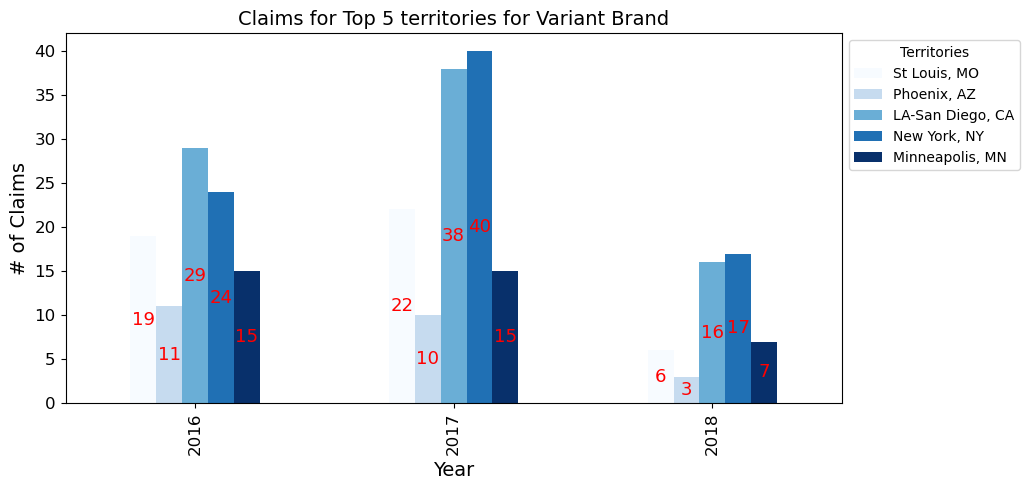

In [132]:


ax = ax = top_5_variant_claims.plot(kind='bar', stacked=False, colormap='Blues', figsize=(13, 5))

# Adding legend
#legend_labels = [f"{code} - {name}" for code, name in procedure_groups.items()]
#ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Setting labels and title
plt.xlabel('Year',fontsize=14)
plt.ylabel('# of Claims',fontsize=14)
plt.title('Claims for Top 5 territories for Variant Brand',fontsize=14)

# Display the percentages inside each segment
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=13, color='red')

# Move the legend outside the graph area
ax.legend(loc='upper left', bbox_to_anchor=(1, 1),title='Territories')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()


#### i.	Find the territory-level claims for the competitor product (J3010)

In [133]:
# Get the total number of unique claims for the competitor Product (J3010) per territory in 2016 - 2018
competitor_brand_claims = joined_df_2016_2018[joined_df_2016_2018['Procedure_code'] == 'J3010']
competitor_brand_claims

,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality,Age,Gender,Territory Name,Region Name,diagnosis_code_market,diagnosis_speciality,Claim_year
0,300876.0,12388.0,7.348084e+09,6/3/2018,9/11/2018,H16223,NaN,NaN,1.0,J3010,36.07,NaN,I10,NaN,NaN,51.01,11,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,18.0,Female,"St Louis, MO",Midwest,I,Circulatory System,2018
4,1599622.0,11045.0,7.348084e+09,3/12/2016,5/10/2017,D010,NaN,NaN,4.0,J3010,36.79,NaN,I10,NaN,NaN,78.46,10,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,79.0,Male,"St Louis, MO",Midwest,I,Circulatory System,2016
7,835809.0,12981.0,7.348084e+09,8/6/2016,5/8/2016,M450,NaN,NaN,1.0,J3010,63.08,NaN,I10,NaN,NaN,68.34,30,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,70.0,Female,"St Louis, MO",Midwest,I,Circulatory System,2016
80,1438571.0,12787.0,2.041597e+09,8/10/2018,4/30/2018,K589,NaN,NaN,1.0,J3010,88.51,NaN,I10,NaN,NaN,94.57,93,566 Anita Creek,Lake Mandyside,NE,04942,Cardiology,22.0,Female,"Pittsburg, PA",Northeast,I,Circulatory System,2018
87,1663959.0,10122.0,3.540379e+09,9/20/2018,9/9/2018,M545,NaN,NaN,4.0,J3010,59.35,NaN,I10,NaN,NaN,9.97,93,45295 Jones Land Apt. 262,Matthewfort,NV,95534,Anesthesiology,77.0,Male,"Cincinnati, OH",Midwest,I,Circulatory System,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28343,1148101.0,12083.0,5.037894e+09,12/25/2016,1/6/2017,D649,1379.23,125725.773600,21.0,J3010,4.49,2.0,A048,NaN,NaN,NaN,NaN,66642 Kimberly Pines,Starkfurt,AR,45433,Anesthesiology,96.0,Female,"San Jose, CA",West,A,Infectious and Parasitic Diseases,2016
28351,1256543.0,11942.0,1.258002e+09,7/8/2016,9/23/2016,Z01411,-100.70,3651.246901,9.0,J3010,11.19,3.0,A048,NaN,NaN,NaN,NaN,733 Snyder Views Suite 298,Pagefurt,LA,93241,Cardiology,69.0,Female,"Denver, CO",West,A,Infectious and Parasitic Diseases,2016
28359,789470.0,12095.0,7.066369e+09,11/7/2018,10/21/2018,E538,23.30,425.836069,5.0,J3010,60.42,4.0,Q2549,NaN,NaN,NaN,NaN,7691 Cassandra Vista Apt. 625,Lake Patrickview,PW,32728,Anesthesiology,48.0,Male,"Birmingham, AL",Southeast,Q,"Congenital Malformations, Deformations and Chr...",2018
28361,241014.0,11901.0,8.063718e+09,4/19/2016,4/22/2016,N925,8.03,483.458000,3.0,J3010,2.06,2.0,Q619,NaN,NaN,NaN,NaN,18320 Andrade Island,South David,MH,98943,Anesthesiology,47.0,Male,"Seattle, WA",West,Q,"Congenital Malformations, Deformations and Chr...",2016


In [134]:
competitor_brand_territory_level = competitor_brand_claims.pivot_table(
    index='Claim_year',
    columns='Territory Name',
    aggfunc='size',
    fill_value=0
)
competitor_brand_territory_level 

Territory Name,"Albany, NY","Atlanta, GA","Birmingham, AL","Boston, MA","Charlotte, NC","Chicago, IL","Cincinnati, OH","Dallas, TX","Denver, CO","Detroit, MI","Houston, TX","LA-San Diego, CA","Minneapolis, MN","New York, NY","Orlando, FL","Philedelphia, PA","Phoenix, AZ","Pittsburg, PA","San Jose, CA","Seattle, WA","St Louis, MO","Washington, D.C."
Claim_year,,,,,,,,,,,,,,,,,,,,,,
2016,35,32,11,33,4,24,12,38,24,9,35,55,14,33,40,43,7,25,38,39,23,35
2017,39,37,21,80,26,29,30,48,52,20,39,86,37,81,71,52,23,35,67,50,40,78
2018,68,81,21,116,35,52,46,77,84,42,70,99,50,153,134,91,32,68,72,64,54,104


In [135]:
top_5_competitor_claims = competitor_brand_territory_level.loc[[2016, 2017, 2018],top_5_territories_variant_brand.index]
top_5_competitor_claims

Territory Name,"St Louis, MO","Phoenix, AZ","LA-San Diego, CA","New York, NY","Minneapolis, MN"
Claim_year,,,,,
2016,23,7,55,33,14
2017,40,23,86,81,37
2018,54,32,99,153,50


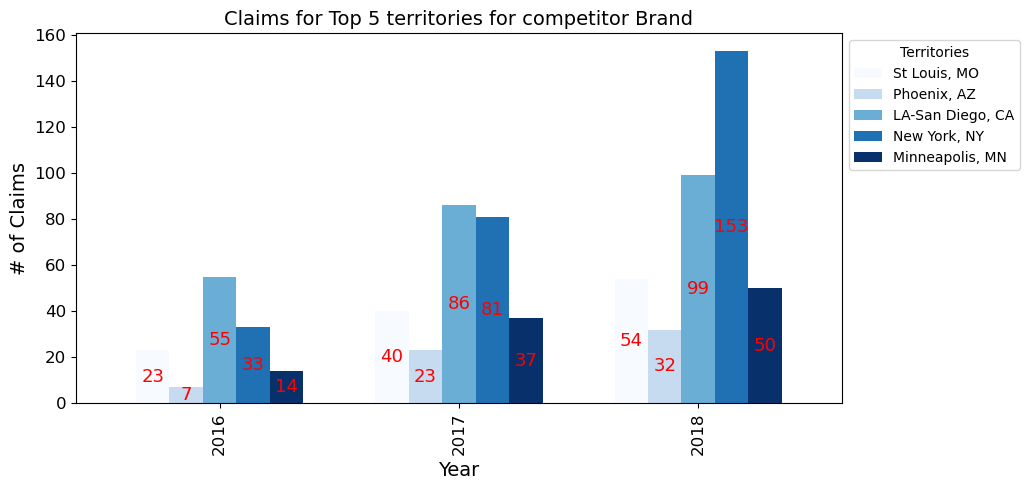

In [136]:

ax = ax = top_5_competitor_claims.plot(kind='bar', width=0.7, stacked=False, colormap='Blues', figsize=(13, 5))

# Adding legend
#legend_labels = [f"{code} - {name}" for code, name in procedure_groups.items()]
#ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Setting labels and title
plt.xlabel('Year',fontsize=14)
plt.ylabel('# of Claims',fontsize=14)
plt.title('Claims for Top 5 territories for competitor Brand',fontsize=14)

# Display the percentages inside each segment
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=13, color='red')

# Move the legend outside the graph area
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Territories')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()

3.	These charts should compare and contrast the relative growth of J3010 compared to the variant brand in these 5 territories for each year, especially between 2017 and 2018.
4.	Strategic recommendations can be different for highly populated Territories and the less populated ones, as they can follow the similar claim volume trends, but the HCP and patient populations are totally different between them. Think about the solutions proposed for Mid Terms.
5.	What do you observe from the charts above? What would be your actionable recommendations based on your observations?


#### The most significant decline in Variant was observed in St. Louis and LA-San Diego, accompanied by a notable shift in market share towards the competitor in New York.

The Year-over-Year change shows a significant decline in the claims for the variant (2017 – 2018)
New York captured a significant new market or more effectively expanding its prescriber base. (Claims increased more than double)

In highly populated territories(NY), with more HCPs -  on broad-reaching initiatives, such as mass media campaigns, larger-scale HCP engagement programs. ​

Participate in conferences, and collaborate on initiatives that align with your Midoride's offerings.​

In less populated territories, tailor message efficiently to HCP personally and conduct small-scale events.​

Motivate salesforce with incentives.

## 2. Identifying the trends of the Key Market Drivers of the Injectable Anesthesia Market:

#### a.	Identify the medical fields or the specialties of the diagnosed patients using the diagnosis codes and the Specialties of the HCPs prescribing these drugs using the specialty group of the HCPs within the injectable anesthesia market (all 4 brands together) for years 2016-2018.

#### i.	Expected outputs:
1.A pie chart showing the percentage of claims that each diagnosis specialty contributes. Extract the diagnosis code initial and map the diagnosis specialty using the diagnosis code mapping dataset. Show only the top 5 diagnosis specialties.


In [137]:
total_clm_by_diag_speciality = joined_df_2016_2018.groupby('diagnosis_speciality')['diagnosis_code_market'].value_counts().nlargest(5)
total_clm_by_diag_speciality

diagnosis_speciality                                                diagnosis_code_market
Circulatory System                                                  I                        15867
Factors Influencing Health Status and Contact with Health Services  Z                         2809
Symptoms, Signs and Abnormal Clinical and Lab Findings              R                         2018
Musculoskeletal and Connective Tissue                               M                         1927
Endocrine, Nutritional, Metabolic                                   E                         1224
Name: diagnosis_code_market, dtype: int64

In [138]:
top_diagnosis_specialties_percentage = total_clm_by_diag_speciality / total_clm_by_diag_speciality.sum() * 100
top_diagnosis_specialties_percentage

diagnosis_speciality                                                diagnosis_code_market
Circulatory System                                                  I                        66.542252
Factors Influencing Health Status and Contact with Health Services  Z                        11.780247
Symptoms, Signs and Abnormal Clinical and Lab Findings              R                         8.462990
Musculoskeletal and Connective Tissue                               M                         8.081359
Endocrine, Nutritional, Metabolic                                   E                         5.133152
Name: diagnosis_code_market, dtype: float64

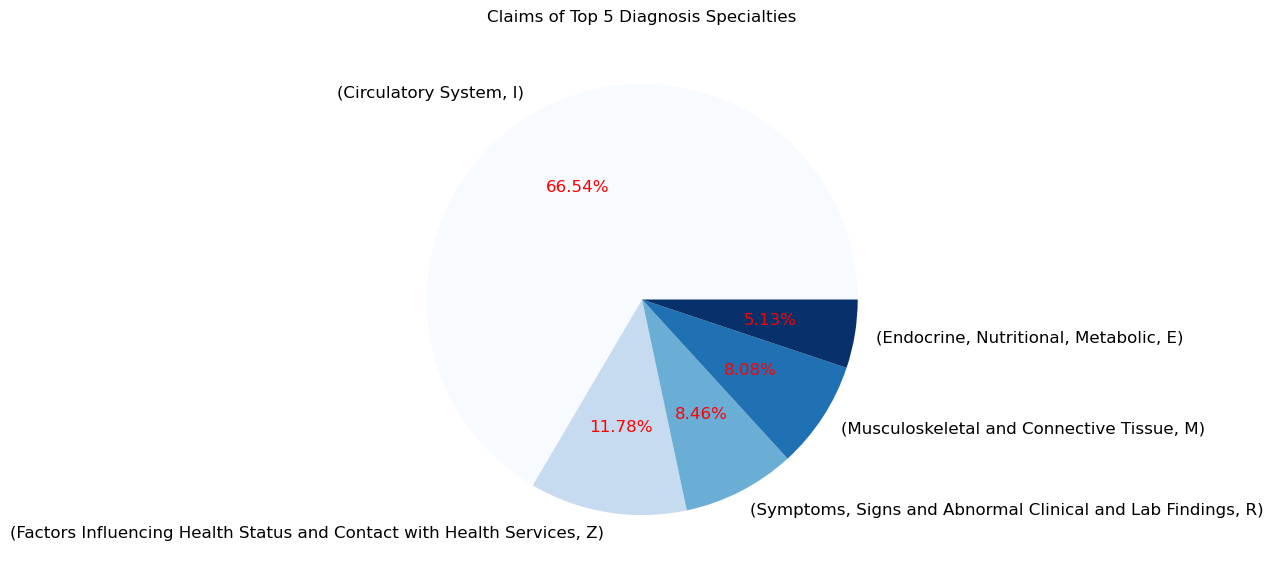

In [139]:
# Plotting the percentage of claims that each diagnosis specialty contributes in a pie chart 
#plt.figure(figsize=(7, 7))
#top_diagnosis_specialties_percentage.plot(kind='pie', autopct='%.2f%%',colormap='Blues')
#plt.title('Claims of Top 5 Diagnosis Specialties')
#plt.ylabel('')

plt.figure(figsize=(7, 7))
top_diagnosis_specialties_percentage.plot(kind='pie', autopct='%.2f%%', colormap='Blues',fontsize=12)
for text in plt.gca().texts:
    if '%' in text.get_text():  
        text.set_color('red')
    else:
        text.set_color('black')  
plt.title('Claims of Top 5 Diagnosis Specialties')
plt.ylabel('') 
plt.show()

#### 2.	A horizontal line graph showing # of writers from each HCP specialty group mapped using the HCP demographics dataset.

In [140]:
top_5_hcp_specialties = joined_df_2016_2018.groupby('HCP_speciality')['HCP_NPI_ID'].nunique().nlargest(5)
top_5_hcp_specialties



HCP_speciality
Anesthesiology      228
Cardiology           86
Orthopedics          64
Gastroenterology     63
Neurology            58
Name: HCP_NPI_ID, dtype: int64

In [141]:
# Plotting the graph showing # of writers from each HCP specialty 

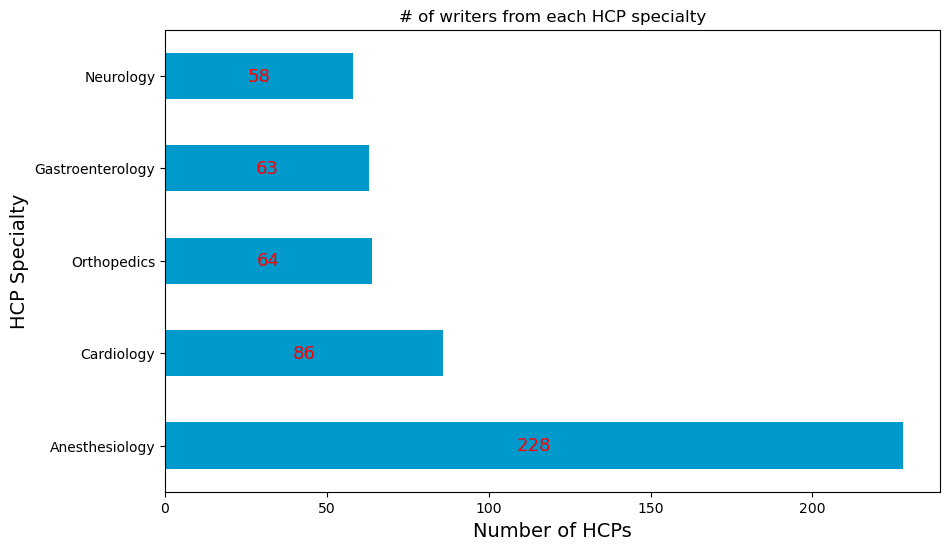

In [142]:
import matplotlib.colors as mcolors
plt.figure(figsize=(10, 6))

light_colormap = mcolors.ListedColormap(['#0099cc', '#66b3ff', '#99ccff', '#cce5ff', '#e6f7ff'])
ax = top_5_hcp_specialties.plot(kind='barh',colormap = light_colormap)

plt.title('# of writers from each HCP specialty')
plt.xlabel('Number of HCPs',fontsize=14)
plt.ylabel('HCP Specialty',fontsize=14)
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=13, color='red')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### 3.	What do you observe from the charts above? What would be your actionable recommendations based on your observations?

Circulatory System related claims have the largest percentage of claims 
Medically critical patients prefer Injectable anesthesia

##### Recommendations - 
Target anesthesiologists of the circulatory system speciality

Assign sales team members with expertise in cardiac diseases to effectively communicate the advantages of Midoride in this field.

### b.	Find the trend of patient and claim distribution based on patient age within the injectable anesthesia market (all 4 brands together) for years 2016-2018.


##### 1.	A bar graph showing # patients from each age group using the following age buckets:
a.18-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81+


In [143]:
# Assigning buckets for age groups 
age_segments = [18, 31, 41, 51, 61, 71, 81, float('inf')]
age_buckets = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']

# Assign Age group for joined_df_2016_2018
joined_df_2016_2018['age_category'] = pd.cut(joined_df_2016_2018['Age'], bins=age_segments, labels=age_buckets, right=False)

# number of patients in each age bucket 
patient_counts_age_group = joined_df_2016_2018.groupby('age_category')['Patient_id'].nunique()


patient_counts_age_group

C:\Users\HP\AppData\Local\Temp\ipykernel_16896\2315218397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df_2016_2018['age_category'] = pd.cut(joined_df_2016_2018['Age'], bins=age_segments, labels=age_buckets, right=False)


age_category
18-30    544
31-40    439
41-50    425
51-60    519
61-70    826
71-80    693
81+      597
Name: Patient_id, dtype: int64

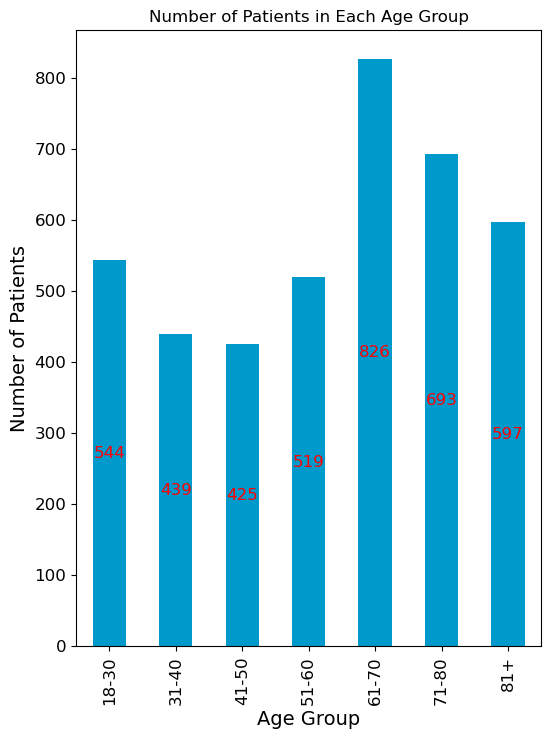

In [144]:
# Plotting Number of Patients in Each Age Group
plt.figure(figsize=(6, 8))

light_colormap = mcolors.ListedColormap(['#0099cc', '#66b3ff', '#99ccff', '#cce5ff', '#e6f7ff'])
ax = patient_counts_age_group.plot(kind='bar',colormap = light_colormap)
#clm_count_by_age_group.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=12, color='red')
plt.title('Number of Patients in Each Age Group')
plt.xlabel('Age Group',fontsize=14)
plt.ylabel('Number of Patients',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [145]:
#percentage of claims made by each age bucket 
clm_count_by_age_group = joined_df_2016_2018.groupby('age_category')['Claim_id'].count()
total_claims = clm_count_by_age_group.sum()
clm_count_by_age_group = (clm_count_by_age_group / total_claims) * 100
clm_count_by_age_group

age_category
18-30    13.121230
31-40    10.521675
41-50    10.056083
51-60    12.546295
61-70    21.008077
71-80    17.773624
81+      14.973017
Name: Claim_id, dtype: float64

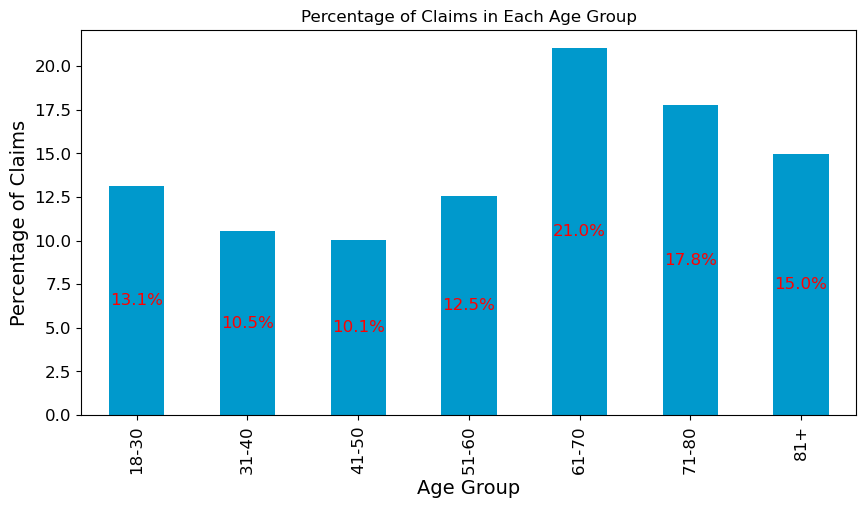

In [146]:

light_colormap = mcolors.ListedColormap(['#0099cc', '#66b3ff', '#99ccff', '#cce5ff', '#e6f7ff'])

plt.figure(figsize=(10, 5))
ax1 = clm_count_by_age_group.plot(kind='bar', colormap=light_colormap)
plt.title('Percentage of Claims in Each Age Group')
plt.xlabel('Age Group',fontsize=14)
plt.ylabel('Percentage of Claims',fontsize=14)

# Apply the custom formatting function to the bar labels
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fontsize=12, color='red', fmt='%.1f%%')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#### 3.	What do you observe from the charts above? What would be your actionable recommendations based on your observations?

##### Observations
The majority of claims are made by patients above 60 years, with the age group 18-30 years identified as the growing segment. 

##### Recommendations
Patients above 60 years are most likely to have injectable anesthesia procedures – Explain HCPs 

18-30 age group are also growing in claiming anesthesia products – recommend HCPs to use Midoride for this age group 

### c.	New and continuing writer (HCP) trends of the four brands. Identify the new HCPs writing for each of the brands based on the claim year from 2016 – 2018 and identify the continuing writers for each of the brands based on the claim year for 2017 and 2018.

##### 1.A clustered bar chart showing # new writers for each brand from each year, where one bar is for one brand, and the bars are grouped into each year from 2016 – 2018. New Writer refers to the HCPs who prescribed the brand for the first time between 2018 and 2018.

In [147]:
# determine the new writers

procedure_groups = {
    'J1885': 'Ketotrom',
    'J2250': 'Midoride',
    'J3010': 'Fentirate',
    'J2704': 'Profativ'
}
#new_writers = joined_df_2016_2018.drop_duplicates(subset=['HCP_NPI_ID', 'Procedure_code']).groupby(['Claim_year', 'Procedure_code'])['HCP_NPI_ID'].count()


joined_df_2016_2018['Product_brand'] = joined_df_2016_2018['Procedure_code'].map(procedure_groups)

joined_df_2016_2018

C:\Users\HP\AppData\Local\Temp\ipykernel_16896\1714536579.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df_2016_2018['Product_brand'] = joined_df_2016_2018['Procedure_code'].map(procedure_groups)


,Claim_id,Patient_id,HCP_NPI_ID,Claim_date,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,Procedure_code,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,Diagnosis_code,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd,Address,City,State,zip_code,HCP_speciality,Age,Gender,Territory Name,Region Name,diagnosis_code_market,diagnosis_speciality,Claim_year,age_category,Product_brand
0,300876.0,12388.0,7.348084e+09,6/3/2018,9/11/2018,H16223,NaN,NaN,1.0,J3010,36.07,NaN,I10,NaN,NaN,51.01,11,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,18.0,Female,"St Louis, MO",Midwest,I,Circulatory System,2018,18-30,Fentirate
1,1207942.0,11684.0,7.348084e+09,5/17/2018,1/6/2018,R010,NaN,NaN,1.0,74230,128.46,NaN,I10,NaN,NaN,237.49,6,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,41.0,Male,"St Louis, MO",Midwest,I,Circulatory System,2018,41-50,NaN
2,421467.0,13194.0,7.348084e+09,10/28/2016,12/25/2016,C61,NaN,NaN,1.0,97162,69.09,NaN,I10,NaN,NaN,96.46,NaN,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,41.0,Female,"St Louis, MO",Midwest,I,Circulatory System,2016,41-50,NaN
3,319575.0,11191.0,7.348084e+09,2/1/2017,12/12/2016,L84,NaN,NaN,2.0,A9270,1.63,NaN,I10,NaN,NaN,9.81,29,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,39.0,Male,"St Louis, MO",Midwest,I,Circulatory System,2017,31-40,NaN
4,1599622.0,11045.0,7.348084e+09,3/12/2016,5/10/2017,D010,NaN,NaN,4.0,J3010,36.79,NaN,I10,NaN,NaN,78.46,10,01683 Garcia Terrace,West Ronaldmouth,MH,10164,Anesthesiology,79.0,Male,"St Louis, MO",Midwest,I,Circulatory System,2016,71-80,Fentirate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28363,419427.0,10503.0,5.360318e+09,1/28/2017,1/5/2017,L03011,1624.30,15804.167890,9.0,J1885,0.64,3.0,Y998,NaN,NaN,NaN,NaN,9364 Goodwin Center Suite 820,New Erin,WA,25328,Anesthesiology,44.0,Female,"Boston, MA",Northeast,Y,External Causes of Morbidity,2017,41-50,Ketotrom
28364,780504.0,10776.0,8.146417e+09,4/21/2017,5/3/2017,H25813,4156.64,12073.690350,5.0,J2250,60.74,3.0,Y838,NaN,NaN,NaN,NaN,5758 Brown Highway,Port Craig,NY,12189,Anesthesiology,70.0,Male,"Atlanta, GA",Southeast,Y,External Causes of Morbidity,2017,61-70,Midoride
28365,585291.0,11631.0,8.584919e+09,9/25/2017,4/15/2017,F39,157.71,519.182827,10.0,J3010,10.09,2.0,Y998,NaN,NaN,NaN,NaN,2785 Lori Route,Rebeccaborough,SC,28163,Anesthesiology,65.0,Male,"Houston, TX",Southeast,Y,External Causes of Morbidity,2017,61-70,Fentirate
28366,1205276.0,11669.0,6.849244e+09,3/14/2017,5/23/2017,I482,130.82,579.673456,1.0,J1885,58.98,1.0,Y998,NaN,NaN,NaN,NaN,4233 Jones Station,Curryburgh,NY,83805,Anesthesiology,30.0,Female,"Seattle, WA",West,Y,External Causes of Morbidity,2017,18-30,Ketotrom


In [148]:
# Identify new writers for each product by year
#new_writers = joined_df_2016_2018.drop_duplicates(subset=['HCP_NPI_ID', 'Product_brand']).groupby(['Claim_year', 'Product_brand']).size().unstack(fill_value=0)
#new_writers


In [149]:
new_writers = joined_df_2016_2018.drop_duplicates(subset=['HCP_NPI_ID', 'Product_brand']).pivot_table(
    index='Claim_year',
    columns='Procedure_code',
    values='HCP_NPI_ID',  # Using 'Patient_id' as values for aggregation
    aggfunc=pd.Series.nunique,  # Use nunique to count the number of unique patients
    fill_value=0
)[procedure_groups.keys()]
new_writers

Procedure_code,J1885,J2250,J3010,J2704
Claim_year,,,,
2016,166,151,104,34
2017,191,168,139,109
2018,142,111,252,221


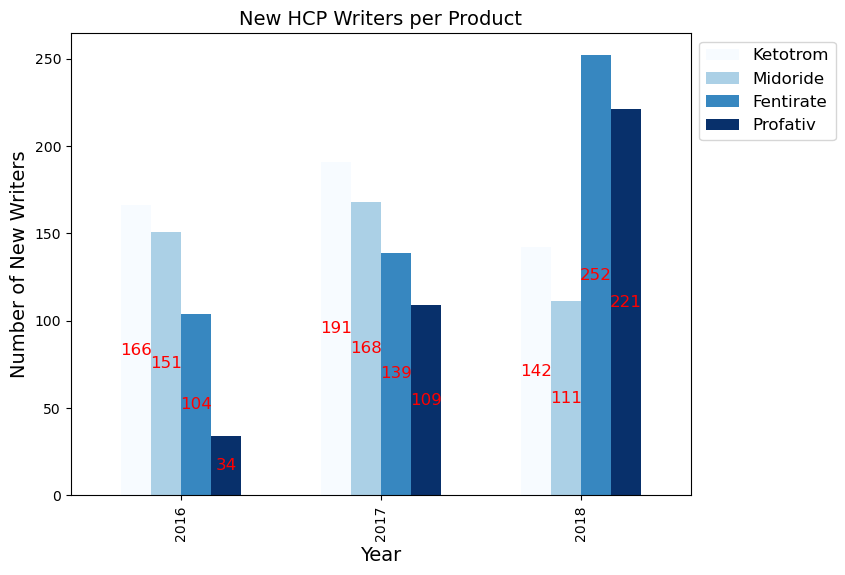

In [150]:

ax = new_writers.plot(kind='bar', width= 0.6,stacked=False, colormap='Blues', figsize=(8, 6))

# Adding legend
legend_labels = [f"{name}" for code, name in procedure_groups.items()]
ax.legend(legend_labels, loc='upper left',fontsize=12, bbox_to_anchor=(1, 1))

# Setting labels and title
plt.title('New HCP Writers per Product',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.ylabel('Number of New Writers',fontsize = 14)

# Display the percentages inside each segment
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=12, color='red')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##### 2.A line chart showing # of continuing writers for each brand for each year between 2017 and 2018 where each line should belong to each brand. The continuing writers are HCPs who continued to write the brand after the first prescription in the following years. 

In [151]:
total_writers = joined_df_2016_2018.pivot_table(
    index='Claim_year',
    columns='Procedure_code',
    values='HCP_NPI_ID',  # Using 'Patient_id' as values for aggregation
    aggfunc=pd.Series.nunique,  # Use nunique to count the number of unique patients
    fill_value=0
)[procedure_groups.keys()]
total_writers

Procedure_code,J1885,J2250,J3010,J2704
Claim_year,,,,
2016,492,285,344,72
2017,495,276,416,187
2018,496,226,468,268


In [152]:

# Number of Continuing writers
continuing_writers = total_writers - new_writers

continuing_writers

Procedure_code,J1885,J2250,J3010,J2704
Claim_year,,,,
2016,326,134,240,38
2017,304,108,277,78
2018,354,115,216,47


In [153]:
continuing_writers_2017_2018 = continuing_writers.loc[[2017, 2018]]
continuing_writers_2017_2018

Procedure_code,J1885,J2250,J3010,J2704
Claim_year,,,,
2017,304,108,277,78
2018,354,115,216,47


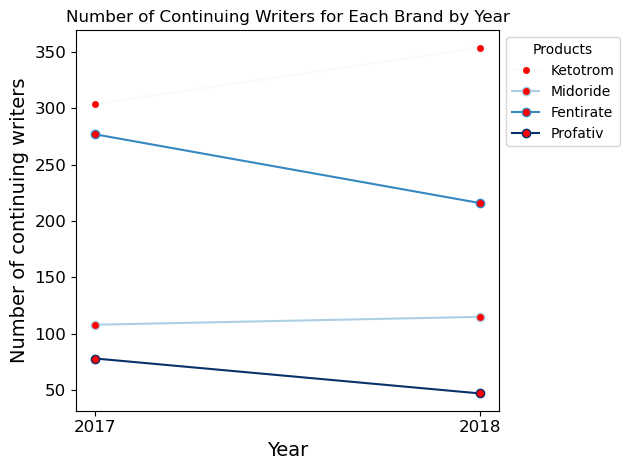

In [154]:

ax= continuing_writers_2017_2018.plot(kind= 'line', colormap = 'Blues',marker = 'o',markerfacecolor='red')
ax.legend(loc='upper left',title='Products',bbox_to_anchor=(1, 1), labels=procedure_groups.values())
plt.title('Number of Continuing Writers for Each Brand by Year')
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Number of continuing writers',fontsize=14)

#axes[1].xaxis.set_major_locator(MaxNLocator(integer=True))  
ax.set_xticks([2017, 2018]) 

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

##### 3.	What do you observe from the charts above? What would be your actionable recommendations based on your observations?

##### Observations 
There has been a 140% increase in new HCP writers for Fentirate from 2016-2018.

The number of new writers for all products exhibited a steady increase from 2016 to 2017. 

However, in 2018, there was a noticeable decline in new prescriptions for Ketotram and Medoride, accompanied by a substantial increase in new prescriptions for Fentirate and Profativ.

Continuing HCP writers remained relatively stable for Ketrotram and Midoride. 

On the other hand, the continuing writers for Fentirate and Profative decreased by 2.3x

##### Recommendations 
Identify the new writers of the competitor brand and attract them to use Midoride - highlight  the performance of Ketotram and Midoride comparitively with competitors in 2016-2017.

To increase Midoride writers, Make the continuing HCPs write more Claims - offer them incentives to continue using Midoride. For example, manufacturers could offer discounts on bulk purchases or provide free samples.